In [4]:
import pandas as pd
from google.colab import drive
from datetime import datetime
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from nltk.util import ngrams
import transformers
from datetime import datetime
import json
import numpy as np
import seaborn as sns
#import spacy

drive.mount('/content/drive')
ts= datetime.now().strftime('%Y-%m-%d_%H-%M')
output_dir = f'/content/drive/My Drive/Colab Notebooks/output/{ts}'
os.makedirs(f"{output_dir}",exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install pyLDAvis
!pwd

/content


In [6]:
# !pip install numpy==1.26.0 --upgrade

# 2) Force-reinstall Gensim so it compiles against the new NumPy
!pip install --upgrade --force-reinstall gensim
!pip install numpy==1.26.4 gensim==4.3.1


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [7]:
## loading df that has data for the specific periods of interest     ('2020-01-01', '2020-05-31'),('2020-10-01', '2021-01-31'),('2021-11-01', '2022-01-31'),('2022-11-01','2023-01-31')

In [8]:
# Specify the path including the folder in your Google Drive
path = '/content/drive/My Drive/Colab Notebooks/selected_df.csv'
# Load the DataFrame from the CSV file
df = pd.read_csv(path)

In [9]:
df.head()

,created_utc,label,score,cleaned_text
0,2020-05-31,mild neu,0.569819,ill pay mosaic much
1,2020-05-31,mild neu,0.617377,redemption november right riding shoe either m...
2,2020-05-31,mild neu,0.610706,sure planning hilton redemption soon wouldnt s...
3,2020-05-31,mild neu,0.576460,thanks
4,2020-05-31,mild neu,0.629136,bigger w


In [10]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 7.2 MB/s eta 0:00:00


In [11]:

# import nltk
# nltk.download('punkt_tab')
!pip install -U spacy
#torch transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 125.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.6
    Uninstalling spacy-3.8.6:
      Successfully uninstalled spacy-3.8.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is in

In [12]:
df.shape[0]

87034

In [13]:
#drop NA
# drop any rows where cleaned_text isn’t a real string
df = df.dropna(subset=['cleaned_text'])
df.shape[0]

86446

In [ ]:
# ## Data cleaning
# import re, string
# import pandas as pd
# import contractions
# from collections import Counter
# import nltk
# from nltk.corpus     import stopwords
# from nltk.tokenize   import word_tokenize
# from nltk.stem       import WordNetLemmatizer




# #  Convert any timestamp column now if you’ll need it:
# df['created_utc'] = pd.to_datetime(df['created_utc'])

# # Define your full-clean function once
# nltk.download('punkt'); nltk.download('stopwords'); nltk.download('wordnet')
# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

# def full_clean(doc):
#     doc = re.sub(r'\s+', ' ', doc).strip()
#     doc = doc.lower()
#     doc = re.sub(r'http\S+|www\.\S+', '', doc)
#     doc = re.sub(r'<.*?>',          '', doc)
#     doc = re.sub(r'@\w+|#\w+',      '', doc)
#     doc = contractions.fix(doc)
#     doc = doc.translate(str.maketrans('', '', string.punctuation))
#     doc = re.sub(r'\d+', '', doc)
#     tokens = [
#         lemmatizer.lemmatize(t)
#         for t in word_tokenize(doc)
#         if t not in stop_words and len(t)>2
#     ]
#     return tokens

# #  Apply it once to every row
# df['tokens']     = df['cleaned_text'].apply(full_clean)
# df['final_text'] = df['tokens'].str.join(' ')


# df[['created_utc','score','final_text','tokens']].head()
## Data Cleaning with spaCy
import re, string
import pandas as pd
import contractions
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")
# nlp = spacy.load("en_core_web_trf")
# Convert timestamp column
df['created_utc'] = pd.to_datetime(df['created_utc'])

# Define full-clean function using spaCy
def full_clean_spacy(doc):
    # Basic regex cleaning
    doc = re.sub(r'\s+', ' ', doc).strip()
    doc = doc.lower()
    doc = re.sub(r'http\S+|www\.\S+', '', doc)
    doc = re.sub(r'<.*?>',          '', doc)
    doc = re.sub(r'@\w+|#\w+',      '', doc)
    doc = contractions.fix(doc)
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    doc = re.sub(r'\d+', '', doc)

    # Process with spaCy
    spacy_doc = nlp(doc)

    # Lemmatize, remove stopwords and short tokens
    tokens = [
        token.lemma_
        for token in spacy_doc
        if not token.is_stop and not token.is_punct and len(token) > 2
    ]
    return tokens

# Apply to each row
df['tokens']     = df['cleaned_text'].apply(full_clean_spacy)
df['final_text'] = df['tokens'].str.join(' ')

# Preview
df[['created_utc','score','final_text','tokens']].head()



In [ ]:
df.shape[0]

In [ ]:
# Filter the DataFrame
high_pos_df = df[df['label'] == 'high pos']

# Convert the 'created_utc' column to datetime
high_pos_df['created_utc'] = pd.to_datetime(high_pos_df['created_utc'])

# Define your date range
start_date = '2021-11-01'
end_date = '2022-01-31'

# Filter the DataFrame for entries within the specified date range
high_pos_df = high_pos_df[(high_pos_df['created_utc'] >= start_date) & (high_pos_df['created_utc'] <= end_date)]


# Print the filtered DataFrame to check the result
high_pos_df.head()

<ipython-input-13-e28bf3387c09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_pos_df['created_utc'] = pd.to_datetime(high_pos_df['created_utc'])


,created_utc,label,score,cleaned_text,tokens,final_text
44037,2022-01-31,high pos,0.884407,japan amazing wife delta first class dfwatlnrt...,"[japan, amazing, wife, delta, class, dfwatlnrt...",japan amazing wife delta class dfwatlnrt mile
44053,2022-01-31,high pos,0.968682,call canaves oia see set suite sunday suite th...,"[canave, oia, set, suite, sunday, suite, amazi...",canave oia set suite sunday suite amazing spot...
44061,2022-01-31,high pos,0.877882,add onto make sure make complaint public socia...,"[add, sure, complaint, public, social, medium,...",add sure complaint public social medium platfo...
44064,2022-01-31,high pos,0.805009,sound like vibrant,"[sound, like, vibrant]",sound like vibrant
44066,2022-01-31,high pos,0.905865,helpful thanks sharing post ill follow share f...,"[helpful, thank, share, post, ill, follow, sha...",helpful thank share post ill follow share fina...


In [ ]:
high_pos_df.shape[0]

2104

     token  count
0     good    760
1    thank    577
2    great    429
3    point    367
4   flight    322
5     like    278
6     nice    267
7     look    250
8     book    241
9    hotel    241
10    time    231
11    stay    230
12   night    219
13     fly    204
14  pretty    203
15    well    201
16      go    200
17     get    190
18   think    188
19    trip    186
20     day    173
21    room    164
22  travel    151
23     way    150
24   hyatt    146
25    know    146
26    want    143
27    love    130
28    find    126
29    year    125


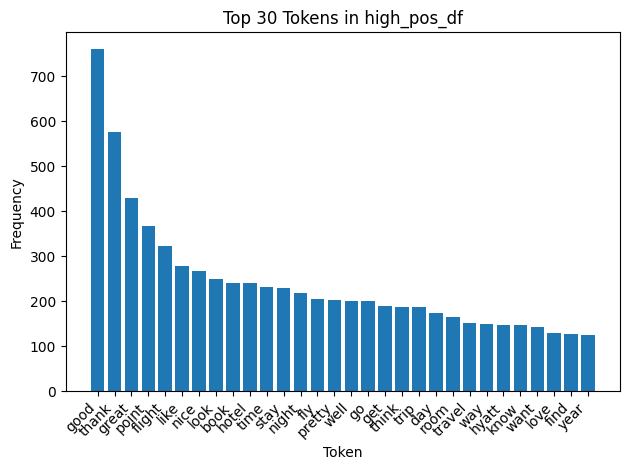

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# 1) Flatten your tokens into one long list
all_tokens = [t for toks in high_pos_df['tokens'] for t in toks]

# 2) Build a frequency distribution
freq = Counter(all_tokens)
common = freq.most_common(30)   # top 30

# 3) Turn it into a DataFrame for easy inspection
df_freq = pd.DataFrame(common, columns=['token','count'])
print(df_freq)

# 4) Plot a simple bar chart of the top tokens
tokens, counts = zip(*common)
plt.figure()
plt.bar(tokens, counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.title('Top 30 Tokens in high_pos_df')
plt.tight_layout()
plt.show()

In [ ]:
# Flatten all tokens into one list
all_words   = [word for tokens in high_pos_df['tokens'] for word in tokens]

# Compute the length (in tokens) of each post
post_length = [len(tokens) for tokens in high_pos_df['tokens']]

# Build the vocabulary
vocab       = sorted(set(all_words))

# Print your summary stats
print(f"{len(all_words)} words total, with a vocabulary size of {len(vocab)}")
print(f"Max reddit post length is {max(post_length)} tokens")
print(f"Mean reddit post length is {sum(post_length)/len(post_length):.2f} tokens")
print(f"Median reddit post length is {sorted(post_length)[len(post_length)//2]} tokens")


33746 words total, with a vocabulary size of 4775
Max reddit post length is 147 tokens
Mean reddit post length is 16.04 tokens
Median reddit post length is 11 tokens


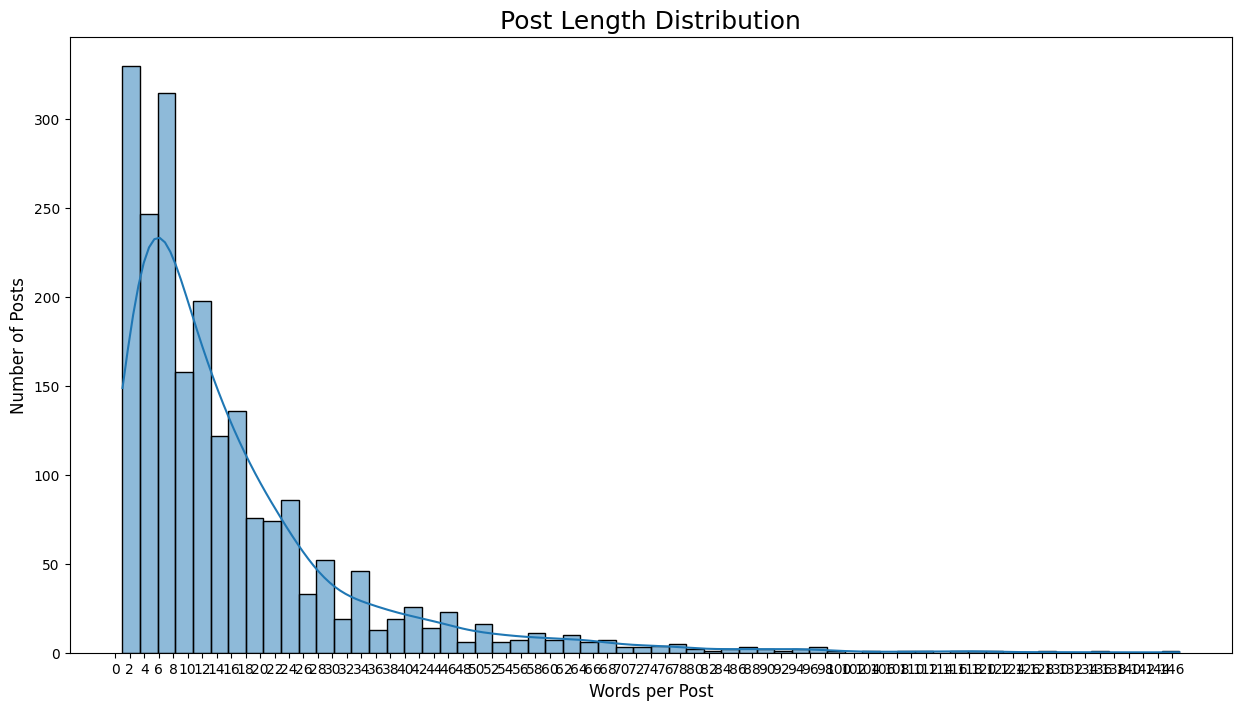

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(post_length, bins=60, kde=True)
plt.title('Post Length Distribution', fontsize=18)
plt.xlabel('Words per Post', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
# Setting x-axis ticks and labels for more detail
max_length = max(post_length)
xticks = np.arange(0, max_length + 1, max_length // 60)
plt.xticks(xticks)
plt.show()

In [ ]:
# !pip install numpy==1.26.0 --upgrade

# # 2) Force-reinstall Gensim so it compiles against the new NumPy
# !pip install --upgrade --force-reinstall gensim

!pip install  gensim


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0 which is incompatible.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torch 2.7.0 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [ ]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# 1) Prepare your list-of-lists from the `tokens` column
texts = high_pos_df['tokens'].tolist()

# 2) Train the bigram detector
bigram = Phrases(texts, min_count=3, threshold=60)
bigram_mod = Phraser(bigram)

# 3) Train the trigram detector on the bigram-transformed texts
trigram = Phrases(bigram[texts], min_count=2, threshold=150)
trigram_mod = Phraser(trigram)

# 4) Apply bigram and trigram transforms
high_pos_df['bigram_tokens']   = high_pos_df['tokens'].apply(lambda doc: bigram_mod[doc])
high_pos_df['trigram_tokens']  = high_pos_df['tokens'].apply(lambda doc: trigram_mod[bigram_mod[doc]])

# # 5
# high_pos_df['bigram_text']   = high_pos_df['bigram_tokens'].str.join(' ')
# high_pos_df['trigram_text']  = high_pos_df['trigram_tokens'].str.join(' ')

# 6) Inspect
print(high_pos_df[['tokens','bigram_tokens','trigram_tokens']].head())


                                                  tokens  \
44037  [japan, amazing, wife, delta, class, dfwatlnrt...   
44053  [canave, oia, set, suite, sunday, suite, amazi...   
44061  [add, sure, complaint, public, social, medium,...   
44064                             [sound, like, vibrant]   
44066  [helpful, thank, share, post, ill, follow, sha...   

                                           bigram_tokens  \
44037  [japan, amazing, wife, delta, class, dfwatlnrt...   
44053  [canave, oia, set, suite, sunday, suite, amazi...   
44061  [add, sure, complaint, public, social, medium,...   
44064                             [sound, like, vibrant]   
44066  [helpful, thank, share, post, ill, follow, sha...   

                                          trigram_tokens  
44037  [japan, amazing, wife, delta, class, dfwatlnrt...  
44053  [canave, oia, set, suite, sunday, suite, amazi...  
44061  [add, sure, complaint, public, social, medium,...  
44064                             [sound, 

In [ ]:
# 1) Helper to detect n-grams in a token list
def contains_ngram(tokenized_list, n):
    return any(len(tok.split('_')) == n for tok in tokenized_list)

# 2) Flag rows
high_pos_df['has_bigrams']  = high_pos_df['bigram_tokens'].apply(lambda doc: contains_ngram(doc, 2))
high_pos_df['has_trigrams'] = high_pos_df['trigram_tokens'].apply(lambda doc: contains_ngram(doc, 3))

# 3) Count
rows_with_bigrams  = high_pos_df['has_bigrams'].sum()
rows_with_trigrams = high_pos_df['has_trigrams'].sum()
rows_with_none     = (~high_pos_df['has_bigrams'] & ~high_pos_df['has_trigrams']).sum()

# 4) Report
print(f"Rows with bigrams:   {rows_with_bigrams}")
print(f"Rows with trigrams:  {rows_with_trigrams}")
print(f"Rows with no n-grams: {rows_with_none}")


Rows with bigrams:   408
Rows with trigrams:  19
Rows with no n-grams: 1696


In [ ]:
high_pos_df.head()

,created_utc,label,score,cleaned_text,tokens,final_text,bigram_tokens,trigram_tokens,has_bigrams,has_trigrams
44037,2022-01-31,high pos,0.884407,japan amazing wife delta first class dfwatlnrt...,"[japan, amazing, wife, delta, class, dfwatlnrt...",japan amazing wife delta class dfwatlnrt mile,"[japan, amazing, wife, delta, class, dfwatlnrt...","[japan, amazing, wife, delta, class, dfwatlnrt...",False,False
44053,2022-01-31,high pos,0.968682,call canaves oia see set suite sunday suite th...,"[canave, oia, set, suite, sunday, suite, amazi...",canave oia set suite sunday suite amazing spot...,"[canave, oia, set, suite, sunday, suite, amazi...","[canave, oia, set, suite, sunday, suite, amazi...",True,False
44061,2022-01-31,high pos,0.877882,add onto make sure make complaint public socia...,"[add, sure, complaint, public, social, medium,...",add sure complaint public social medium platfo...,"[add, sure, complaint, public, social, medium,...","[add, sure, complaint, public, social, medium,...",False,False
44064,2022-01-31,high pos,0.805009,sound like vibrant,"[sound, like, vibrant]",sound like vibrant,"[sound, like, vibrant]","[sound, like, vibrant]",False,False
44066,2022-01-31,high pos,0.905865,helpful thanks sharing post ill follow share f...,"[helpful, thank, share, post, ill, follow, sha...",helpful thank share post ill follow share fina...,"[helpful, thank, share, post, ill, follow, sha...","[helpful, thank, share, post, ill, follow, sha...",False,False


In [ ]:
# Print the total number of rows in the DataFrame
total_rows = high_pos_df.shape[0]
print(f"Total number of rows in the DataFrame: {total_rows}")

# Check the number of rows in the 'trigram_tokenized' column
print(f"Number of rows in 'trigram_tokenized' column: {high_pos_df['trigram_tokens'].shape[0]}")

Total number of rows in the DataFrame: 2104
Number of rows in 'trigram_tokenized' column: 2104


In [ ]:
import itertools
from collections import Counter

# 1) Flatten all trigram lists into one big sequence
all_trigrams = itertools.chain.from_iterable(high_pos_df['trigram_tokens'])

# 2)
trigram_counts = Counter(
    token for token in all_trigrams
    if isinstance(token, str) and token.count('_') == 2
)

# 3) How many unique trigrams?
total_unique_trigrams = len(trigram_counts)
print(f"Total number of unique trigrams: {total_unique_trigrams}")

# 4) Show the 10 most common trigrams
print("\nMost common trigrams:")
for trigram, count in trigram_counts.most_common(10):
    print(f"{trigram}: {count:,}")


Total number of unique trigrams: 5

Most common trigrams:
couple_week_ago: 5
conrad_bora_bora: 4
chicago_athletic_association: 4
lie_flat_seat: 3
grand_hyatt_vail: 3


In [ ]:
# import gensim.corpora as corpora
# # Create Dictionary
# id2word = corpora.Dictionary(high_pos_df['trigram_tokens'].tolist())

# ## pruning
# #id2word.filter_extremes(no_below=5, no_above=0.5)

# #    (Optional) Re-map the remaining token IDs to remove gaps
# #id2word.compactify()

# # 2. Convert each document to a Bag-of-Words
# texts = high_pos_df['trigram_tokens'].tolist()

# # Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]


# # View
# print(corpus[:1][0][:30])

In [ ]:
# import gensim
# from gensim import corpora
# from gensim.models.ldamodel import LdaModel
# from nltk.tokenize import word_tokenize
# import nltk
# ## Build the basic LDA model
# lda_model = LdaModel(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=4,
#                                        random_state=100,
#                                        chunksize=250,
#                                        passes=260,
#                                         iterations=50,
#                                        alpha='auto',
#                                       eta='auto',
#                                        per_word_topics=True)

In [ ]:
# from pprint import pprint
# #
# # Print the Keyword in the 3 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [ ]:
# from gensim.models import CoherenceModel

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=high_pos_df['trigram_tokenized'], dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('Coherence Score: ', coherence_lda)

In [ ]:
# import pyLDAvis.gensim
# import pickle
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis
# import pyLDAvis

# # Assuming ldamodel, corpus, and dictionary are already defined
# # Enable the automatic display of visualizations in Jupyter
# pyLDAvis.enable_notebook()

# # Prepare the LDA visualization directly
# LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# # Display the prepared visualization directly in the notebook
# pyLDAvis.display(LDAvis_prepared)

In [ ]:

## FIND THE OPTIMAL TOPIC

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import numpy as np
import itertools

#
texts = high_pos_df['trigram_tokens'].tolist()

# Create a Dictionary and Corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Function to compute coherence and perplexity
def compute_coherence_and_perplexity(corpus, dictionary, texts, num_topics, chunksize, passes, iterations, seed):
    lda_model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=seed,
                         chunksize=chunksize,
                         passes=passes,
                         iterations=iterations,
                         alpha='auto',
                         eta='auto',
                         per_word_topics=True)

    perplexity = lda_model.log_perplexity(corpus)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
      # Extract alpha and eta
    alpha = lda_model.alpha
    eta = lda_model.eta
    return perplexity, coherence, alpha, eta

# Define the parameter grid with your specific values
seeds = [0, 1, 2]
num_topics_range = range(2, 10)  # Adjust the range based on your needs
chunksize_range = [250]
passes_range = [ 100,  200,260]
iterations_range = [50,  100,  200]

# Store results
results = []

# Grid search over all combinations of hyperparameters
for seed in [0, 1, 2]:
  for num_topics, chunksize, passes, iterations in itertools.product(num_topics_range, chunksize_range, passes_range, iterations_range):
    perplexity, coherence, alpha, eta = compute_coherence_and_perplexity(corpus, dictionary, texts, num_topics, chunksize, passes, iterations,seed)
    results.append((num_topics, chunksize, passes, iterations, perplexity, coherence, alpha, eta,seed))
    print(f"Num Topics: {num_topics}, Chunksize: {chunksize}, Passes: {passes}, Iterations: {iterations}, Perplexity: {perplexity:.4f}, Coherence: {coherence:.4f},Alpha: {alpha}, Eta: {eta}")

# Convert results to a DataFrame for better analysis
results_df = pd.DataFrame(results, columns=['num_topics', 'chunksize', 'passes', 'iterations', 'perplexity', 'coherence','alpha','eta','seed'])
# Add exponentiated perplexity column
results_df['perplexity_exp'] = np.exp(-results_df['perplexity'])

# Display results
print("\nResults:")
print(results_df)

# Find the optimal number of topics with the highest coherence
optimal_result = results_df.sort_values(
    by=['coherence', 'perplexity_exp'],
    ascending=[False, True]
).iloc[0]
optimal_num_topics = optimal_result['num_topics']
optimal_chunksize = optimal_result['chunksize']
optimal_passes = optimal_result['passes']
optimal_iterations = optimal_result['iterations']
optimal_perplexity = optimal_result['perplexity_exp']
optimal_coherence = optimal_result['coherence']
optimal_alpha = optimal_result['alpha']
optimal_eta   = optimal_result['eta']
optimal_seed = optimal_result['seed']

print(f"\nOptimal Parameters:")
print(f"Number of Topics: {optimal_num_topics}")
print(f"Chunksize: {optimal_chunksize}")
print(f"Passes: {optimal_passes}")
print(f"Iterations: {optimal_iterations}")
print(f"Coherence: {optimal_coherence:.4f}")
print(f"Perplexity: {optimal_perplexity:.4f}")
print(f" Alpha (per topic): {optimal_alpha}")
print(f" Eta   (per word):  {optimal_eta}")
print(f" seed:  {optimal_seed}")

Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 50, Perplexity: -7.1713, Coherence: 0.5957,Alpha: [0.09823165 0.03640047], Eta: [13.044117    3.218819    2.5601707  ...  0.49833414  0.49833417
  0.49833417]


Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 100, Perplexity: -7.1708, Coherence: 0.6049,Alpha: [0.09656534 0.03519717], Eta: [13.1298485   3.1844513   2.542774   ...  0.4993085   0.49930856
  0.49930856]


Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 200, Perplexity: -7.1704, Coherence: 0.6049,Alpha: [0.09557083 0.03479598], Eta: [13.124553    3.2320383   2.550275   ...  0.4992681   0.49926823
  0.49926823]
Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 50, Perplexity: -7.1614, Coherence: 0.5957,Alpha: [0.08530556 0.03279698], Eta: [13.244292    3.345454    2.6300347  ...  0.50462836  0.5046285
  0.5046285 ]


Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 100, Perplexity: -7.1608, Coherence: 0.6022,Alpha: [0.0833142  0.03156488], Eta: [13.318633    3.3402383   2.6234484  ...  0.5055197   0.50551975
  0.50551975]


Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 200, Perplexity: -7.1604, Coherence: 0.6022,Alpha: [0.08208986 0.03103949], Eta: [13.333741   3.3709743  2.6309469 ...  0.5058105  0.5058106  0.5058106]
Num Topics: 2, Chunksize: 250, Passes: 260, Iterations: 50, Perplexity: -7.1584, Coherence: 0.5957,Alpha: [0.08094396 0.03134705], Eta: [13.320143   3.604044   2.65092   ...  0.5065502  0.5065502  0.5065502]


Num Topics: 2, Chunksize: 250, Passes: 260, Iterations: 100, Perplexity: -7.1578, Coherence: 0.6022,Alpha: [0.07918348 0.03014312], Eta: [13.394918    3.6176517   2.6437724  ...  0.50738794  0.507388
  0.507388  ]


Num Topics: 2, Chunksize: 250, Passes: 260, Iterations: 200, Perplexity: -7.1581, Coherence: 0.6022,Alpha: [0.07918224 0.03011419], Eta: [13.373166   3.620528   2.6472187 ...  0.5070832  0.5070832  0.5070832]
Num Topics: 3, Chunksize: 250, Passes: 100, Iterations: 50, Perplexity: -7.2487, Coherence: 0.5393,Alpha: [0.4084753  0.04699777 0.12831686], Eta: [1.7477481  0.711456   0.45858437 ... 0.29162166 0.29534215 0.29534215]
Num Topics: 3, Chunksize: 250, Passes: 100, Iterations: 100, Perplexity: -7.2557, Coherence: 0.5213,Alpha: [0.3918421  0.04319441 0.12487625], Eta: [1.4073322  0.71828747 0.4490048  ... 0.29221636 0.29534003 0.29534003]
Num Topics: 3, Chunksize: 250, Passes: 100, Iterations: 200, Perplexity: -7.2564, Coherence: 0.5575,Alpha: [0.43780252 0.04440485 0.13193081], Eta: [1.3965112  0.7082333  0.46488592 ... 0.29252365 0.29252365 0.29252365]
Num Topics: 3, Chunksize: 250, Passes: 200, Iterations: 50, Perplexity: -7.2353, Coherence: 0.5262,Alpha: [0.3050495  0.03828412 0.1

Num Topics: 9, Chunksize: 250, Passes: 260, Iterations: 200, Perplexity: -7.4997, Coherence: 0.4717,Alpha: [0.6812087  0.33335423 0.69521534 0.5063165  0.5980403  3.965924
 0.51332617 0.37587744 0.23208325], Eta: [0.12597105 0.10641783 0.10709316 ... 0.10279952 0.10280109 0.10280109]
Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 50, Perplexity: -7.2010, Coherence: 0.5378,Alpha: [0.0770817  0.11764615], Eta: [11.546604    3.7599561   1.6991754  ...  0.49966407  0.4996643
  0.4996643 ]


Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 100, Perplexity: -7.2008, Coherence: 0.5307,Alpha: [0.07293457 0.11890549], Eta: [11.586453   3.7664201  1.7395264 ...  0.5003649  0.5003651  0.5003651]


Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 200, Perplexity: -7.2009, Coherence: 0.5238,Alpha: [0.07231823 0.11827356], Eta: [11.592868    3.7659142   1.741141   ...  0.50043046  0.50043064
  0.50043064]
Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 50, Perplexity: -7.1774, Coherence: 0.5373,Alpha: [0.04949643 0.06119516], Eta: [12.821108    3.63282     2.7641897  ...  0.51678     0.51678026
  0.51678026]


Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 100, Perplexity: -7.1856, Coherence: 0.5307,Alpha: [0.06431586 0.09905967], Eta: [12.355116    3.89433     2.9946918  ...  0.51176417  0.5117644
  0.5117644 ]


Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 200, Perplexity: -7.1917, Coherence: 0.5307,Alpha: [0.06780364 0.11089458], Eta: [11.83969     3.8238494   2.9428263  ...  0.5065365   0.50653666
  0.50653666]
Num Topics: 2, Chunksize: 250, Passes: 260, Iterations: 50, Perplexity: -7.1656, Coherence: 0.5431,Alpha: [0.05916154 0.04079282], Eta: [13.120472   3.6359527  2.7729542 ...  0.5158145  0.5157722  0.5157722]


Num Topics: 2, Chunksize: 250, Passes: 260, Iterations: 100, Perplexity: -7.1771, Coherence: 0.5373,Alpha: [0.04656779 0.06511436], Eta: [13.046453    3.9943721   2.879865   ...  0.51863676  0.5186368
  0.5186368 ]


Num Topics: 2, Chunksize: 250, Passes: 260, Iterations: 200, Perplexity: -7.1812, Coherence: 0.4987,Alpha: [0.0588895  0.08782157], Eta: [12.464159   3.9423501  2.981718  ...  0.5158163  0.5158164  0.5158164]
Num Topics: 3, Chunksize: 250, Passes: 100, Iterations: 50, Perplexity: -7.2345, Coherence: 0.5773,Alpha: [0.05172748 0.10093024 0.33320183], Eta: [6.1369295  0.7939977  0.79203933 ... 0.29613087 0.29613099 0.29613099]
Num Topics: 3, Chunksize: 250, Passes: 100, Iterations: 100, Perplexity: -7.2445, Coherence: 0.5696,Alpha: [0.06003145 0.11998878 0.3412061 ], Eta: [6.8836374  0.773561   0.51596326 ... 0.29569033 0.2983893  0.2983893 ]
Num Topics: 3, Chunksize: 250, Passes: 100, Iterations: 200, Perplexity: -7.2497, Coherence: 0.5602,Alpha: [0.05940514 0.1316003  0.3141343 ], Eta: [6.730612   0.7879545  0.4990339  ... 0.294928   0.29744247 0.29744247]
Num Topics: 3, Chunksize: 250, Passes: 200, Iterations: 50, Perplexity: -7.2208, Coherence: 0.5471,Alpha: [0.04293854 0.086367   0.2

Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 50, Perplexity: -7.1747, Coherence: 0.5694,Alpha: [0.1168841  0.04632355], Eta: [12.039091    3.4530108   2.51944    ...  0.49170992  0.49171
  0.49171   ]


Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 100, Perplexity: -7.1747, Coherence: 0.5813,Alpha: [0.11621943 0.04592111], Eta: [12.03941     3.4544895   2.519906   ...  0.4917752   0.49177536
  0.49177536]


Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 200, Perplexity: -7.1724, Coherence: 0.5813,Alpha: [0.1085481  0.04172294], Eta: [12.379579    3.273668    2.5400796  ...  0.49461323  0.49461332
  0.49461332]
Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 50, Perplexity: -7.1649, Coherence: 0.5694,Alpha: [0.10180044 0.04127721], Eta: [12.322073    3.504265    2.5698187  ...  0.49837583  0.49837592
  0.49837592]


Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 100, Perplexity: -7.1648, Coherence: 0.5694,Alpha: [0.10129967 0.04100788], Eta: [12.329163    3.506604    2.5710797  ...  0.49852052  0.4985206
  0.4985206 ]


Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 200, Perplexity: -7.1626, Coherence: 0.5694,Alpha: [0.09398589 0.0370623 ], Eta: [12.587271   3.5524604  2.5983214 ...  0.5013166  0.5013167  0.5013167]
Num Topics: 2, Chunksize: 250, Passes: 260, Iterations: 50, Perplexity: -7.1625, Coherence: 0.5694,Alpha: [0.09972535 0.04082904], Eta: [12.363525    3.5167153   2.5851414  ...  0.4997696   0.49976966
  0.49976966]


Num Topics: 2, Chunksize: 250, Passes: 260, Iterations: 100, Perplexity: -7.1623, Coherence: 0.5694,Alpha: [0.09882586 0.04037399], Eta: [12.370344    3.5184557   2.5861835  ...  0.49989846  0.49989852
  0.49989852]


Num Topics: 2, Chunksize: 250, Passes: 260, Iterations: 200, Perplexity: -7.1593, Coherence: 0.5910,Alpha: [0.08765395 0.03540426], Eta: [12.666918    3.5762334   2.6198006  ...  0.5035543   0.50355434
  0.50355434]
Num Topics: 3, Chunksize: 250, Passes: 100, Iterations: 50, Perplexity: -7.2237, Coherence: 0.5538,Alpha: [0.19435309 0.08418409 0.11158797], Eta: [5.7821636  0.7644007  0.49793926 ... 0.29659763 0.29659772 0.29659772]
Num Topics: 3, Chunksize: 250, Passes: 100, Iterations: 100, Perplexity: -7.2274, Coherence: 0.5670,Alpha: [0.22340406 0.08527085 0.10970245], Eta: [5.4645095  0.92354316 0.49223977 ... 0.29580617 0.2958062  0.2958062 ]
Num Topics: 3, Chunksize: 250, Passes: 100, Iterations: 200, Perplexity: -7.2380, Coherence: 0.5766,Alpha: [0.3207515  0.08343608 0.10442518], Eta: [4.89922    0.8627121  0.47959384 ... 0.29308116 0.29308125 0.29308125]
Num Topics: 3, Chunksize: 250, Passes: 200, Iterations: 50, Perplexity: -7.2104, Coherence: 0.5599,Alpha: [0.16151503 0.07555

In [ ]:
# 1. Fit the model
lda_opt = LdaModel(
    corpus        = corpus,
    id2word       = dictionary,
    num_topics    = optimal_num_topics,
    chunksize     = optimal_chunksize,
    passes        = optimal_passes,
    iterations    = optimal_iterations,
    alpha         = 'auto',
    eta           = 'auto',
    random_state  = optimal_seed,
    per_word_topics=True
)

# 2. Extract metrics and priors
opt_perp  = lda_opt.log_perplexity(corpus)
opt_coh   = CoherenceModel(model=lda_opt, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()
opt_alpha = lda_opt.alpha
opt_eta   = lda_opt.eta

print(f"Re-fitted Optimal Model:")
print(f" Coherence: {opt_coh:.4f}")
print(f" Perplexity: {opt_perp:.4f}")
print(f" Alpha (per topic): {opt_alpha}")
print(f" Eta   (per word):  {opt_eta}")


Re-fitted Optimal Model:
 Coherence: 0.6328
 Perplexity: -7.3347
 Alpha (per topic): [1.2700977  0.22973149 0.38555712 0.11484723]
 Eta   (per word):  [0.5061277  0.3097013  0.27534142 ... 0.21447194 0.21446556 0.21446556]


In [ ]:
import numpy as np
from google.colab import files

# 1. Grab your metrics & hyper‐params
coherence_val  = opt_coh
perplexity_val = opt_perp
alpha_val      = opt_alpha
eta_vals       = opt_eta  # full array

# 2. Write them into a single text file
with open('lda_model_full_summary.txt', 'w') as f:
    f.write("Re-fitted Optimal Model:\n")
    f.write(f" Coherence:  {coherence_val:.4f}\n")
    f.write(f" Perplexity: {perplexity_val:.4f}\n")
    f.write(f" Alpha:      {alpha_val}\n")
    f.write(" Eta values:\n")
    for eta in eta_vals:
        f.write(f"{eta}\n")

# 3. Trigger the download
files.download('lda_model_full_summary.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# verify that the refit recovered the same priors
import numpy as np

print("Alpha match:", np.allclose(optimal_alpha, opt_alpha))
print("Eta   match:", np.allclose(optimal_eta,   opt_eta))


Alpha match: True
Eta   match: True


In [ ]:
#  Imports
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Print topics & sample document–topic distribution
print("=== Topics ===")
pprint(lda_opt.print_topics())

doc_topics = [lda_opt.get_document_topics(doc) for doc in corpus]
print("\nSample doc-topic distribution for doc 0:")
pprint(doc_topics[0])



=== Topics ===
[(0,
  '0.038*"good" + 0.035*"thank" + 0.018*"great" + 0.017*"point" + 0.013*"time" '
  '+ 0.013*"like" + 0.010*"look" + 0.010*"get" + 0.010*"go" + 0.010*"trip"'),
 (1,
  '0.020*"room" + 0.018*"stay" + 0.017*"hotel" + 0.013*"food" + 0.012*"resort" '
  '+ 0.011*"great" + 0.010*"beach" + 0.010*"restaurant" + 0.010*"property" + '
  '0.010*"breakfast"'),
 (2,
  '0.041*"flight" + 0.021*"fly" + 0.016*"pretty" + 0.015*"airline" + '
  '0.012*"good" + 0.010*"mile" + 0.009*"book" + 0.009*"seat" + '
  '0.008*"transfer" + 0.008*"airport"'),
 (3,
  '0.009*"pretty" + 0.008*"test" + 0.008*"gift" + 0.007*"research" + '
  '0.006*"share" + 0.005*"issue" + 0.005*"thread" + 0.005*"upcoming" + '
  '0.004*"contact" + 0.004*"number"')]

Sample doc-topic distribution for doc 0:
[(0, 0.3633562), (1, 0.02634588), (2, 0.5975315), (3, 0.01276639)]


In [ ]:
# Cell 3: pyLDAvis visualization
# (make sure you’ve run `%matplotlib inline` or enabled notebook output)
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_opt, corpus, dictionary)
pyLDAvis.display(vis_data)


In [ ]:
# Cell 4: Print the top 30 terms per topic
print("\n=== Top 30 terms per topic ===")
for topic_id, term_weights in lda_opt.show_topics(
        num_topics=lda_opt.num_topics,
        num_words=30,
        formatted=False):
    print(f"Topic {topic_id + 1}:")
    for word, weight in term_weights:
        print(f"  {word} ({weight:.4f})")
    print()



=== Top 30 terms per topic ===
Topic 1:
  good (0.0377)
  thank (0.0346)
  great (0.0183)
  point (0.0169)
  time (0.0130)
  like (0.0129)
  look (0.0105)
  get (0.0103)
  go (0.0097)
  trip (0.0096)
  nice (0.0092)
  think (0.0088)
  know (0.0086)
  book (0.0079)
  night (0.0078)
  day (0.0077)
  travel (0.0077)
  love (0.0066)
  sure (0.0066)
  way (0.0066)
  luck (0.0066)
  appreciate (0.0064)
  definitely (0.0061)
  awesome (0.0061)
  try (0.0059)
  use (0.0059)
  work (0.0058)
  help (0.0057)
  year (0.0056)
  hotel (0.0055)

Topic 2:
  room (0.0197)
  stay (0.0176)
  hotel (0.0168)
  food (0.0127)
  resort (0.0121)
  great (0.0109)
  beach (0.0105)
  restaurant (0.0097)
  property (0.0096)
  breakfast (0.0096)
  nice (0.0088)
  hilton (0.0087)
  suite (0.0077)
  location (0.0074)
  night (0.0070)
  island (0.0063)
  amazing (0.0060)
  fun (0.0059)
  view (0.0058)
  hyatt (0.0054)
  place (0.0053)
  beautiful (0.0051)
  walk (0.0049)
  pool (0.0047)
  well (0.0046)
  pretty (0.00

In [ ]:
lda_opt.save('/content/drive/MyDrive/lda_model_pos_3rd_wave_normal.gensim')

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(high_pos_df['trigram_tokens'].tolist())

## pruning
id2word.filter_extremes(no_below=5, no_above=0.7)

#    (Optional) Re-map the remaining token IDs to remove gaps
id2word.compactify()

# 2. Convert each document to a Bag-of-Words
texts = high_pos_df['trigram_tokens'].tolist()

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [ ]:

## FIND THE OPTIMAL TOPIC

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import numpy as np
import itertools



# Create a Dictionary and Corpus
dictionary = id2word

# Function to compute coherence and perplexity
def compute_coherence_and_perplexity(corpus, dictionary, texts, num_topics, chunksize, passes, iterations):
    lda_model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=100,
                         chunksize=chunksize,
                         passes=passes,
                         iterations=iterations,
                         alpha='auto',
                         eta='auto',
                         per_word_topics=True)

    perplexity = lda_model.log_perplexity(corpus)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
      # Extract alpha and eta
    alpha = lda_model.alpha
    eta = lda_model.eta
    return perplexity, coherence, alpha, eta

# Define the parameter grid with your specific values
num_topics_range = range(2, 10)  # Adjust the range based on your needs
chunksize_range = [250]
passes_range = [ 100,  200,260]
iterations_range = [50,  100,  200]

# Store results
results = []

# Grid search over all combinations of hyperparameters
for num_topics, chunksize, passes, iterations in itertools.product(num_topics_range, chunksize_range, passes_range, iterations_range):
    perplexity, coherence, alpha, eta = compute_coherence_and_perplexity(corpus, dictionary, texts, num_topics, chunksize, passes, iterations)
    results.append((num_topics, chunksize, passes, iterations, perplexity, coherence, alpha, eta))
    print(f"Num Topics: {num_topics}, Chunksize: {chunksize}, Passes: {passes}, Iterations: {iterations}, Perplexity: {perplexity:.4f}, Coherence: {coherence:.4f},Alpha: {alpha}, Eta: {eta}")

# Convert results to a DataFrame for better analysis
results_df = pd.DataFrame(results, columns=['num_topics', 'chunksize', 'passes', 'iterations', 'perplexity', 'coherence','alpha','eta'])
# Add exponentiated perplexity column
results_df['perplexity_exp'] = np.exp(-results_df['perplexity'])

# Display results
print("\nResults:")
print(results_df)

# Find the optimal number of topics with the highest coherence
optimal_result = results_df.sort_values(
    by=['coherence', 'perplexity_exp'],
    ascending=[False, True]
).iloc[0]
optimal_num_topics = optimal_result['num_topics']
optimal_chunksize = optimal_result['chunksize']
optimal_passes = optimal_result['passes']
optimal_iterations = optimal_result['iterations']
optimal_perplexity = optimal_result['perplexity_exp']
optimal_coherence = optimal_result['coherence']
optimal_alpha = optimal_result['alpha']
optimal_eta   = optimal_result['eta']

print(f"\nOptimal Parameters:")
print(f"Number of Topics: {optimal_num_topics}")
print(f"Chunksize: {optimal_chunksize}")
print(f"Passes: {optimal_passes}")
print(f"Iterations: {optimal_iterations}")
print(f"Coherence: {optimal_coherence:.4f}")
print(f"Perplexity: {optimal_perplexity:.4f}")
print(f" Alpha (per topic): {optimal_alpha}")
print(f" Eta   (per word):  {optimal_eta}")

Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 50, Perplexity: -6.2894, Coherence: 0.5460,Alpha: [0.85154074 0.3591016 ], Eta: [0.8679108  1.3579798  0.69991124 ... 0.5801679  0.42946726 0.41835058]


Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 100, Perplexity: -6.2891, Coherence: 0.5460,Alpha: [0.82974416 0.3419973 ], Eta: [0.8746096  1.3699641  0.70069563 ... 0.5818271  0.4303163  0.41894275]


Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 200, Perplexity: -6.2888, Coherence: 0.5460,Alpha: [0.8080241 0.3296578], Eta: [0.8860459  1.378012   0.70288545 ... 0.58315426 0.43091345 0.41920853]
Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 50, Perplexity: -6.2805, Coherence: 0.5433,Alpha: [0.4488507  0.19026355], Eta: [1.1094767  1.5257974  0.752858   ... 0.61525637 0.44441637 0.43107602]


Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 100, Perplexity: -6.2800, Coherence: 0.5433,Alpha: [0.4149312 0.1782398], Eta: [1.1466179  1.5340992  0.7580111  ... 0.6188849  0.44500542 0.43285385]


Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 200, Perplexity: -6.2799, Coherence: 0.5433,Alpha: [0.39490178 0.1722277 ], Eta: [1.1766005  1.5369657  0.76095814 ... 0.62057245 0.4454824  0.43380263]


Num Topics: 2, Chunksize: 250, Passes: 260, Iterations: 50, Perplexity: -6.2781, Coherence: 0.5433,Alpha: [0.3472985  0.15975308], Eta: [1.3527226  1.5509313  0.76994693 ... 0.6259655  0.44854537 0.43696165]
Num Topics: 2, Chunksize: 250, Passes: 260, Iterations: 100, Perplexity: -6.2777, Coherence: 0.5433,Alpha: [0.32808134 0.15237506], Eta: [1.4220021  1.5586156  0.7713356  ... 0.6285441  0.44912377 0.4379521 ]


Num Topics: 2, Chunksize: 250, Passes: 260, Iterations: 200, Perplexity: -6.2775, Coherence: 0.5433,Alpha: [0.31793413 0.14906196], Eta: [1.4648644  1.5626295  0.7719267  ... 0.62968457 0.44946408 0.43848872]


Num Topics: 3, Chunksize: 250, Passes: 100, Iterations: 50, Perplexity: -6.3046, Coherence: 0.5417,Alpha: [0.5388312  0.14091776 1.2869322 ], Eta: [0.32861182 0.5147308  0.30395532 ... 0.24147624 0.26298794 0.33765164]
Num Topics: 3, Chunksize: 250, Passes: 100, Iterations: 100, Perplexity: -6.3097, Coherence: 0.5660,Alpha: [0.5350651  0.13024276 1.437608  ], Eta: [0.33435705 0.5926762  0.30758902 ... 0.24678747 0.25992033 0.24984725]


Num Topics: 3, Chunksize: 250, Passes: 100, Iterations: 200, Perplexity: -6.3110, Coherence: 0.5438,Alpha: [0.5975644  0.13316162 1.5478082 ], Eta: [0.34459227 0.5192934  0.31261694 ... 0.24947153 0.26285788 0.25094804]


Num Topics: 3, Chunksize: 250, Passes: 200, Iterations: 50, Perplexity: -6.2940, Coherence: 0.5530,Alpha: [0.36840966 0.11243932 0.96051764], Eta: [0.33480912 0.54118675 0.31234795 ... 0.24360624 0.2632672  0.2506934 ]


Num Topics: 3, Chunksize: 250, Passes: 200, Iterations: 100, Perplexity: -6.2973, Coherence: 0.5607,Alpha: [0.3634533  0.10334611 1.0339932 ], Eta: [0.34167352 0.7831677  0.31026003 ... 0.24627797 0.26046616 0.25279596]
Num Topics: 3, Chunksize: 250, Passes: 200, Iterations: 200, Perplexity: -6.2990, Coherence: 0.5794,Alpha: [0.4687657  0.10032512 1.1880888 ], Eta: [0.3461272  0.5926519  0.31665984 ... 0.24915516 0.26232153 0.25134313]


Num Topics: 3, Chunksize: 250, Passes: 260, Iterations: 50, Perplexity: -6.2914, Coherence: 0.5647,Alpha: [0.35186997 0.1050811  0.909143  ], Eta: [0.33658224 0.5434679  0.31266516 ... 0.24419779 0.2623029  0.2511952 ]
Num Topics: 3, Chunksize: 250, Passes: 260, Iterations: 100, Perplexity: -6.2929, Coherence: 0.5952,Alpha: [0.31743735 0.08905373 0.8914029 ], Eta: [0.34291214 0.8746911  0.31158605 ... 0.24699652 0.2606578  0.2534116 ]


Num Topics: 3, Chunksize: 250, Passes: 260, Iterations: 200, Perplexity: -6.2923, Coherence: 0.5783,Alpha: [0.38419366 0.09737043 0.96959233], Eta: [0.34421968 0.6170402  0.31968394 ... 0.24718006 0.2606575  0.25162736]
Num Topics: 4, Chunksize: 250, Passes: 100, Iterations: 50, Perplexity: -6.3542, Coherence: 0.4893,Alpha: [1.6319859  0.30788517 3.0831223  0.2625586 ], Eta: [0.22216092 0.29725528 0.2136691  ... 0.18951572 0.19999391 0.19490398]
Num Topics: 4, Chunksize: 250, Passes: 100, Iterations: 100, Perplexity: -6.3603, Coherence: 0.5027,Alpha: [1.9376575  0.3861331  3.5308568  0.32771432], Eta: [0.22077894 0.29514676 0.21267532 ... 0.18874949 0.19948764 0.19104153]
Num Topics: 4, Chunksize: 250, Passes: 100, Iterations: 200, Perplexity: -6.3603, Coherence: 0.5306,Alpha: [1.9599707  0.33521983 3.7697124  0.36890957], Eta: [0.22294421 0.28595948 0.21399805 ... 0.18969984 0.2010936  0.19039796]
Num Topics: 4, Chunksize: 250, Passes: 200, Iterations: 50, Perplexity: -6.3502, Coheren

In [ ]:
# 1. Fit the model
lda_opt = LdaModel(
    corpus        = corpus,
    id2word       = dictionary,
    num_topics    = optimal_num_topics,
    chunksize     = optimal_chunksize,
    passes        = optimal_passes,
    iterations    = optimal_iterations,
    alpha         = 'auto',
    eta           = 'auto',
    random_state  = 100,
    per_word_topics=True
)

# 2. Extract metrics and priors
opt_perp  = lda_opt.log_perplexity(corpus)
opt_coh   = CoherenceModel(model=lda_opt, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()
opt_alpha = lda_opt.alpha
opt_eta   = lda_opt.eta

print(f"Re-fitted Optimal Model:")
print(f" Coherence: {opt_coh:.4f}")
print(f" Perplexity: {opt_perp:.4f}")
print(f" Alpha (per topic): {opt_alpha}")
print(f" Eta   (per word):  {opt_eta}")


Re-fitted Optimal Model:
 Coherence: 0.5952
 Perplexity: -6.2929
 Alpha (per topic): [0.31743735 0.08905373 0.8914029 ]
 Eta   (per word):  [0.34291214 0.8746911  0.31158605 ... 0.24699652 0.2606578  0.2534116 ]


In [ ]:
import numpy as np
from google.colab import files

# 1. Grab your metrics & hyper‐params
coherence_val  = opt_coh
perplexity_val = opt_perp
alpha_val      = opt_alpha
eta_vals       = opt_eta  # full array

# 2. Write them into a single text file
with open('lda_model_full_summary.txt', 'w') as f:
    f.write("Re-fitted Optimal Model:\n")
    f.write(f" Coherence:  {coherence_val:.4f}\n")
    f.write(f" Perplexity: {perplexity_val:.4f}\n")
    f.write(f" Alpha:      {alpha_val}\n")
    f.write(" Eta values:\n")
    for eta in eta_vals:
        f.write(f"{eta}\n")

# 3. Trigger the download
files.download('lda_model_full_summary.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Cell 3: verify that the refit recovered the same priors
import numpy as np

print("Alpha match:", np.allclose(optimal_alpha, opt_alpha))
print("Eta   match:", np.allclose(optimal_eta,   opt_eta))


Alpha match: True
Eta   match: True


In [ ]:
# Cell 1: Imports
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Cell 2: Print topics & sample document–topic distribution
print("=== Topics ===")
pprint(lda_opt.print_topics())

doc_topics = [lda_opt.get_document_topics(doc) for doc in corpus]
print("\nSample doc-topic distribution for doc 0:")
pprint(doc_topics[0])



=== Topics ===
[(0,
  '0.025*"hotel" + 0.023*"stay" + 0.021*"night" + 0.019*"great" + 0.016*"room" '
  '+ 0.015*"nice" + 0.012*"amazing" + 0.010*"food" + 0.010*"good" + '
  '0.010*"resort"'),
 (1,
  '0.039*"flight" + 0.035*"fly" + 0.033*"seat" + 0.026*"delta" + '
  '0.023*"economy" + 0.016*"hour" + 0.013*"business_class" + 0.010*"nice" + '
  '0.010*"way" + 0.010*"food"'),
 (2,
  '0.042*"good" + 0.038*"thank" + 0.017*"flight" + 0.017*"point" + '
  '0.014*"great" + 0.014*"book" + 0.012*"look" + 0.012*"like" + 0.010*"pretty" '
  '+ 0.010*"know"')]

Sample doc-topic distribution for doc 0:
[(0, 0.31951267), (1, 0.26875415), (2, 0.41173318)]


In [ ]:

pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_opt, corpus, dictionary)
pyLDAvis.display(vis_data)


In [ ]:
# Cell 4: Print the top 30 terms per topic
print("\n=== Top 30 terms per topic ===")
for topic_id, term_weights in lda_opt.show_topics(
        num_topics=lda_opt.num_topics,
        num_words=30,
        formatted=False):
    print(f"Topic {topic_id + 1}:")
    for word, weight in term_weights:
        print(f"  {word} ({weight:.4f})")
    print()



=== Top 30 terms per topic ===
Topic 1:
  hotel (0.0248)
  stay (0.0229)
  night (0.0212)
  great (0.0186)
  room (0.0161)
  nice (0.0146)
  amazing (0.0118)
  food (0.0102)
  good (0.0102)
  resort (0.0101)
  upgrade (0.0094)
  hyatt (0.0094)
  free (0.0093)
  time (0.0092)
  hilton (0.0089)
  beach (0.0088)
  day (0.0086)
  go (0.0085)
  like (0.0082)
  place (0.0081)
  restaurant (0.0081)
  property (0.0081)
  breakfast (0.0080)
  marriott (0.0072)
  status (0.0068)
  think (0.0065)
  suite (0.0064)
  location (0.0062)
  well (0.0061)
  want (0.0060)

Topic 2:
  flight (0.0395)
  fly (0.0346)
  seat (0.0335)
  delta (0.0261)
  economy (0.0225)
  hour (0.0160)
  business_class (0.0125)
  nice (0.0104)
  way (0.0103)
  food (0.0101)
  country (0.0098)
  well (0.0096)
  airline (0.0095)
  pretty (0.0090)
  class (0.0088)
  different (0.0085)
  service (0.0083)
  line (0.0081)
  long (0.0080)
  usually (0.0080)
  main (0.0079)
  drink (0.0079)
  family (0.0078)
  sleep (0.0075)
  bag (

In [ ]:
lda_opt.save('/content/drive/MyDrive/lda_model_pos_3rd_wave_pruned.gensim')

In [ ]:
# # Visualization (Optional)
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Coherence vs. Number of Topics
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=results_df, x='num_topics', y='coherence', hue='chunksize', marker='o')
# plt.title('Coherence Score vs Number of Topics')
# plt.xlabel('Number of Topics')
# plt.ylabel('Coherence Score')
# plt.legend(title='Chunksize')
# plt.show()

# # Perplexity vs. Number of Topics
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=results_df, x='num_topics', y='perplexity', hue='chunksize', marker='o')
# plt.title('Perplexity vs Number of Topics')
# plt.xlabel('Number of Topics')
# plt.ylabel('Perplexity')
# plt.legend(title='Chunksize')
# plt.show()

# # Coherence vs. Perplexity (Trade-off)
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=results_df, x='perplexity', y='coherence', hue='num_topics', style='chunksize', s=100)
# plt.title('Coherence vs Perplexity')
# plt.xlabel('Perplexity')
# plt.ylabel('Coherence Score')
# plt.legend(title='Num Topics')
# plt.show()

In [ ]:
# # Extracting and printing the top 30 salient terms for each topic
# num_topics = lda_model.num_topics
# num_words = 30

# for idx, topic in lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=False):
#     print(f"Topic {idx + 1}:")
#     for word, weight in topic:
#         print(f"  {word} ({weight:.4f})")
#     print()

In [13]:
####### HIGH NEGATIVE FOR FIRST COVID WAVE ########
# Filter the DataFrame
high_neg_first_wave_df = df[df['label'] == 'high neg']

# Convert the 'created_utc' column to datetime
high_neg_first_wave_df['created_utc'] = pd.to_datetime(high_neg_first_wave_df['created_utc'])

# Define your date range
start_date = '2021-11-01'
end_date = '2022-01-31'

# Filter the DataFrame for entries within the specified date range
high_neg_first_wave_df = high_neg_first_wave_df[(high_neg_first_wave_df['created_utc'] >= start_date) & (high_neg_first_wave_df['created_utc'] <= end_date)]


# Print the filtered DataFrame to check the result
high_neg_first_wave_df.head()

<ipython-input-13-b29a71013a69>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_neg_first_wave_df['created_utc'] = pd.to_datetime(high_neg_first_wave_df['created_utc'])


,created_utc,label,score,cleaned_text,tokens,final_text
44039,2022-01-31,high neg,0.789412,really mean thing yikes trust booking hotel ch...,"[mean, thing, yike, trust, book, hotel, change...",mean thing yike trust book hotel change mind
44046,2022-01-31,high neg,0.780422,hotel already admitted messed due greed,"[hotel, admit, messed, greed]",hotel admit messed greed
44060,2022-01-31,high neg,0.860192,thanks ton didnt sound like knew talking tryin...,"[thank, ton, sound, like, know, talk, try, cou...",thank ton sound like know talk try course cent...
44099,2022-01-31,high neg,0.901313,first class die trying,"[class, die, try]",class die try
44223,2022-01-30,high neg,0.871596,transferring point citiamex wont work right,"[transfer, point, citiamex, work, right]",transfer point citiamex work right


In [14]:
high_neg_first_wave_df.shape[0]

914

      token  count
0    flight    203
1      like    130
2       bad     99
3   airline     95
4      time     94
5       try     88
6       get     85
7      book     82
8    people     80
9     point     78
10   travel     77
11     know     63
12      fly     57
13      day     57
14       go     57
15   cancel     57
16     suck     56
17      use     55
18     work     54
19    think     54
20   ticket     52
21     shit     50
22     year     50
23  service     50
24     look     50
25     find     49
26     yeah     48
27     good     48
28     want     48
29      ask     47


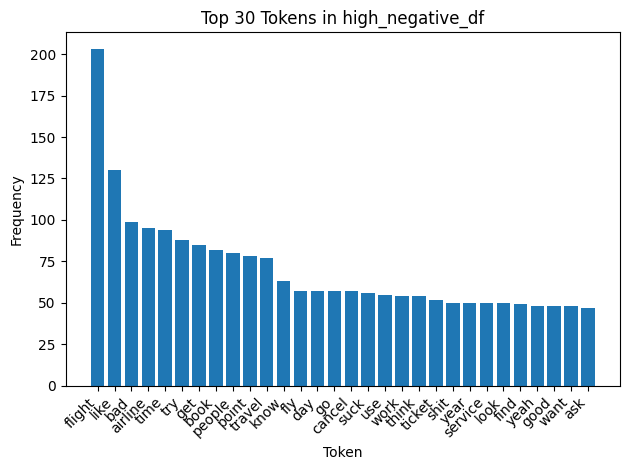

In [15]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# 1) Flatten your tokens into one long list
all_tokens = [t for toks in high_neg_first_wave_df['tokens'] for t in toks]

# 2) Build a frequency distribution
freq = Counter(all_tokens)
common = freq.most_common(30)   # top 30

# 3) Turn it into a DataFrame for easy inspection
df_freq = pd.DataFrame(common, columns=['token','count'])
print(df_freq)

# 4) Plot a simple bar chart of the top tokens
tokens, counts = zip(*common)
plt.figure()
plt.bar(tokens, counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.title('Top 30 Tokens in high_negative_df')
plt.tight_layout()
plt.show()

In [16]:
# Flatten all tokens into one list
all_words   = [word for tokens in high_neg_first_wave_df['tokens'] for word in tokens]

# Compute the length (in tokens) of each post
post_length = [len(tokens) for tokens in high_neg_first_wave_df['tokens']]

# Build the vocabulary
vocab       = sorted(set(all_words))

# Print your summary stats
print(f"{len(all_words)} words total, with a vocabulary size of {len(vocab)}")
print(f"Max reddit post length is {max(post_length)} tokens")
print(f"Mean reddit post length is {sum(post_length)/len(post_length):.2f} tokens")
print(f"Median reddit post length is {sorted(post_length)[len(post_length)//2]} tokens")


12267 words total, with a vocabulary size of 3005
Max reddit post length is 112 tokens
Mean reddit post length is 13.42 tokens
Median reddit post length is 10 tokens


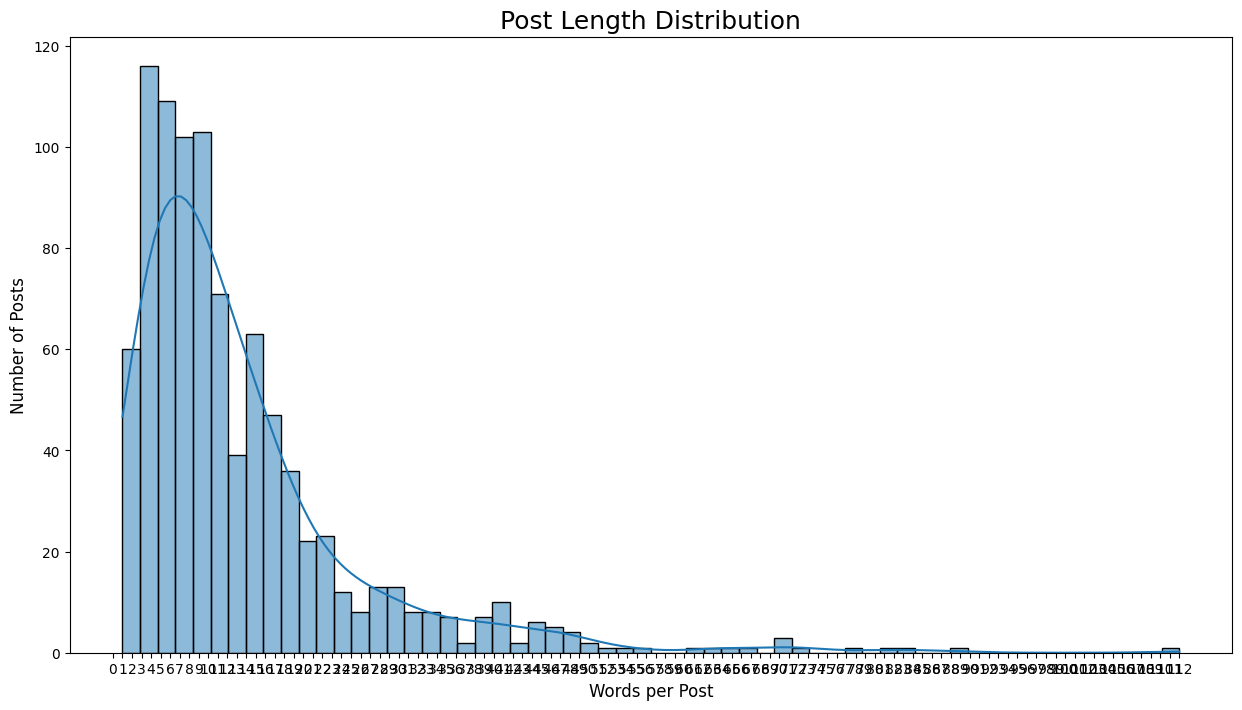

In [17]:
plt.figure(figsize=(15, 8))
sns.histplot(post_length, bins=60, kde=True)
plt.title('Post Length Distribution', fontsize=18)
plt.xlabel('Words per Post', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
# Setting x-axis ticks and labels for more detail
max_length = max(post_length)
xticks = np.arange(0, max_length + 1, max_length // 60)
plt.xticks(xticks)
plt.show()

In [18]:
!pip install  gensim


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0 which is incompatible.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torch 2.7.0 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [19]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# 1) Prepare your list-of-lists from the `tokens` column
texts = high_neg_first_wave_df['tokens'].tolist()

# 2) Train the bigram detector
bigram = Phrases(texts, min_count=3, threshold=50)
bigram_mod = Phraser(bigram)

# 3) Train the trigram detector on the bigram-transformed texts
trigram = Phrases(bigram[texts], min_count=2, threshold=150)
trigram_mod = Phraser(trigram)

# 4) Apply bigram and trigram transforms
high_neg_first_wave_df['bigram_tokens']   = high_neg_first_wave_df['tokens'].apply(lambda doc: bigram_mod[doc])
high_neg_first_wave_df['trigram_tokens']  = high_neg_first_wave_df['tokens'].apply(lambda doc: trigram_mod[bigram_mod[doc]])

# # 5)
# high_neg_first_wave_df['bigram_text']   = high_neg_first_wave_df['bigram_tokens'].str.join(' ')
# high_neg_first_wave_df['trigram_text']  = high_neg_first_wave_df['trigram_tokens'].str.join(' ')

# 6) Inspect
print(high_neg_first_wave_df[['tokens','bigram_tokens','trigram_tokens']].head())


                                                  tokens  \
44039  [mean, thing, yike, trust, book, hotel, change...   
44046                      [hotel, admit, messed, greed]   
44060  [thank, ton, sound, like, know, talk, try, cou...   
44099                                  [class, die, try]   
44223           [transfer, point, citiamex, work, right]   

                                           bigram_tokens  \
44039  [mean, thing, yike, trust, book, hotel, change...   
44046                      [hotel, admit, messed, greed]   
44060  [thank, ton, sound_like, know, talk, try, cour...   
44099                                  [class, die, try]   
44223           [transfer, point, citiamex, work, right]   

                                          trigram_tokens  
44039  [mean, thing, yike, trust, book, hotel, change...  
44046                      [hotel, admit, messed, greed]  
44060  [thank, ton, sound_like, know, talk, try, cour...  
44099                                  [cl

In [20]:
# 1) Helper to detect n-grams in a token list
def contains_ngram(tokenized_list, n):
    return any(len(tok.split('_')) == n for tok in tokenized_list)

# 2) Flag rows
high_neg_first_wave_df['has_bigrams']  = high_neg_first_wave_df['bigram_tokens'].apply(lambda doc: contains_ngram(doc, 2))
high_neg_first_wave_df['has_trigrams'] = high_neg_first_wave_df['trigram_tokens'].apply(lambda doc: contains_ngram(doc, 3))

# 3) Count
rows_with_bigrams  = high_neg_first_wave_df['has_bigrams'].sum()
rows_with_trigrams = high_neg_first_wave_df['has_trigrams'].sum()
rows_with_none     = (~high_neg_first_wave_df['has_bigrams'] & ~high_neg_first_wave_df['has_trigrams']).sum()

# 4) Report
print(f"Rows with bigrams:   {rows_with_bigrams}")
print(f"Rows with trigrams:  {rows_with_trigrams}")
print(f"Rows with no n-grams: {rows_with_none}")


Rows with bigrams:   95
Rows with trigrams:  0
Rows with no n-grams: 819


In [21]:
high_neg_first_wave_df.head()

,created_utc,label,score,cleaned_text,tokens,final_text,bigram_tokens,trigram_tokens,has_bigrams,has_trigrams
44039,2022-01-31,high neg,0.789412,really mean thing yikes trust booking hotel ch...,"[mean, thing, yike, trust, book, hotel, change...",mean thing yike trust book hotel change mind,"[mean, thing, yike, trust, book, hotel, change...","[mean, thing, yike, trust, book, hotel, change...",False,False
44046,2022-01-31,high neg,0.780422,hotel already admitted messed due greed,"[hotel, admit, messed, greed]",hotel admit messed greed,"[hotel, admit, messed, greed]","[hotel, admit, messed, greed]",False,False
44060,2022-01-31,high neg,0.860192,thanks ton didnt sound like knew talking tryin...,"[thank, ton, sound, like, know, talk, try, cou...",thank ton sound like know talk try course cent...,"[thank, ton, sound_like, know, talk, try, cour...","[thank, ton, sound_like, know, talk, try, cour...",True,False
44099,2022-01-31,high neg,0.901313,first class die trying,"[class, die, try]",class die try,"[class, die, try]","[class, die, try]",False,False
44223,2022-01-30,high neg,0.871596,transferring point citiamex wont work right,"[transfer, point, citiamex, work, right]",transfer point citiamex work right,"[transfer, point, citiamex, work, right]","[transfer, point, citiamex, work, right]",False,False


In [22]:
# Print the total number of rows in the DataFrame
total_rows = high_neg_first_wave_df.shape[0]
print(f"Total number of rows in the DataFrame: {total_rows}")

# Check the number of rows in the 'trigram_tokenized' column
print(f"Number of rows in 'trigram_tokenized' column: {high_neg_first_wave_df['trigram_tokens'].shape[0]}")

Total number of rows in the DataFrame: 914
Number of rows in 'trigram_tokenized' column: 914


In [23]:
import itertools
from collections import Counter

# 1) Flatten all trigram lists into one big sequence
all_trigrams = itertools.chain.from_iterable(high_neg_first_wave_df['trigram_tokens'])

# 2) Filter for genuine trigrams (exactly two underscores → three words joined)
trigram_counts = Counter(
    token for token in all_trigrams
    if isinstance(token, str) and token.count('_') == 2
)

# 3) How many unique trigrams?
total_unique_trigrams = len(trigram_counts)
print(f"Total number of unique trigrams: {total_unique_trigrams}")

# 4) Show the 10 most common trigrams
print("\nMost common trigrams:")
for trigram, count in trigram_counts.most_common(10):
    print(f"{trigram}: {count:,}")


Total number of unique trigrams: 0

Most common trigrams:


In [24]:
# import gensim.corpora as corpora
# # Create Dictionary
# id2word = corpora.Dictionary(high_neg_first_wave_df['trigram_tokens'].tolist())

# ## pruning
# #id2word.filter_extremes(no_below=5, no_above=0.5)

# #    (Optional) Re-map the remaining token IDs to remove gaps
# #id2word.compactify()

# # 2. Convert each document to a Bag-of-Words
# texts = high_neg_first_wave_df['trigram_tokens'].tolist()

# # Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]


# # View
# print(corpus[:1][0][:30])

In [25]:
# import gensim
# from gensim import corpora
# from gensim.models.ldamodel import LdaModel
# from nltk.tokenize import word_tokenize
# import nltk
# ## Build the basic LDA model
# lda_model = LdaModel(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=4,
#                                        random_state=100,
#                                        chunksize=250,
#                                        passes=260,
#                                         iterations=200,
#                                        alpha='auto',
#                                       eta='auto',
#                                        per_word_topics=True)

In [26]:
# from pprint import pprint

# # Print the Keyword in the 3 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [27]:
# from gensim.models import CoherenceModel

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=high_neg_first_wave_df['trigram_tokenized'], dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('Coherence Score: ', coherence_lda)

In [28]:
!pip install pyLDAvis

In [29]:

## FIND THE OPTIMAL TOPIC

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import numpy as np
import itertools

#
texts = high_neg_first_wave_df['trigram_tokens'].tolist()

# Create a Dictionary and Corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Function to compute coherence and perplexity
def compute_coherence_and_perplexity(corpus, dictionary, texts, num_topics, chunksize, passes, iterations, seed):
    lda_model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=seed,
                         chunksize=chunksize,
                         passes=passes,
                         iterations=iterations,
                         alpha='auto',
                         eta='auto',
                         per_word_topics=True)

    perplexity = lda_model.log_perplexity(corpus)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
      # Extract alpha and eta
    alpha = lda_model.alpha
    eta = lda_model.eta
    return perplexity, coherence, alpha, eta

# Define the parameter grid with your specific values
seeds = [0, 1, 2]
num_topics_range = range(2, 10)  # Adjust the range based on your needs
chunksize_range = [250]
passes_range = [100,  200,260]
iterations_range = [50,  100, 200]

# Store results
results = []

# Grid search over all combinations of hyperparameters
for seed in [0, 1, 2]:
  for num_topics, chunksize, passes, iterations in itertools.product(num_topics_range, chunksize_range, passes_range, iterations_range):
    perplexity, coherence, alpha, eta = compute_coherence_and_perplexity(corpus, dictionary, texts, num_topics, chunksize, passes, iterations,seed)
    results.append((num_topics, chunksize, passes, iterations, perplexity, coherence, alpha, eta,seed))
    print(f"Num Topics: {num_topics}, Chunksize: {chunksize}, Passes: {passes}, Iterations: {iterations}, Perplexity: {perplexity:.4f}, Coherence: {coherence:.4f} , Alpha: {alpha}, Eta:{eta}")

# Convert results to a DataFrame for better analysis
results_df = pd.DataFrame(results, columns=['num_topics', 'chunksize', 'passes', 'iterations', 'perplexity', 'coherence', 'alpha', 'eta','seed'])

# Add exponentiated perplexity column
results_df['perplexity_exp'] = np.exp(-results_df['perplexity'])


# Display results
print("\nResults:")
print(results_df)

# Find the optimal number of topics with the highest coherence
optimal_result = results_df.sort_values(
    by=['coherence', 'perplexity_exp'],
    ascending=[False, True]
).iloc[0]
optimal_num_topics = optimal_result['num_topics']
optimal_chunksize = optimal_result['chunksize']
optimal_passes = optimal_result['passes']
optimal_iterations = optimal_result['iterations']
optimal_perplexity = optimal_result['perplexity_exp']
optimal_coherence = optimal_result['coherence']
optimal_alpha = optimal_result['alpha']
optimal_eta   = optimal_result['eta']
optimal_seed = optimal_result['seed']


print(f"\nOptimal Parameters:")
print(f"Number of Topics: {optimal_num_topics}")
print(f"Chunksize: {optimal_chunksize}")
print(f"Passes: {optimal_passes}")
print(f"Iterations: {optimal_iterations}")
print(f"Coherence: {optimal_coherence:.4f}")
print(f"Perplexity: {optimal_perplexity:.4f}")
print(f" Alpha (per topic): {optimal_alpha}")
print(f" Eta   (per word):  {optimal_eta}")
print(f" seed:  {optimal_seed}")

Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 50, Perplexity: -7.3683, Coherence: 0.3490 , Alpha: [0.1634541  0.04603896], Eta:[1.9003145 4.242158  2.800189  ... 0.5297697 0.5297697 0.5297697]
Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 100, Perplexity: -7.3632, Coherence: 0.3340 , Alpha: [0.14685795 0.04184797], Eta:[1.9854932 4.522226  2.5977473 ... 0.5340052 0.5340052 0.5340052]
Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 200, Perplexity: -7.3636, Coherence: 0.3561 , Alpha: [0.14435892 0.04093273], Eta:[1.9475207  4.788543   2.615282   ... 0.53566056 0.53566056 0.53566056]
Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 50, Perplexity: -7.3614, Coherence: 0.3492 , Alpha: [0.1456845  0.04191352], Eta:[1.9138756 4.322665  2.8724778 ... 0.5328035 0.5328035 0.5328035]
Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 100, Perplexity: -7.3511, Coherence: 0.3556 , Alpha: [0.11491337 0.03457896], Eta:[2.0396497  5.149303   2.7916148  ... 0.54

In [30]:
# 1. Fit the model
lda_opt = LdaModel(
    corpus        = corpus,
    id2word       = dictionary,
    num_topics    = optimal_num_topics,
    chunksize     = optimal_chunksize,
    passes        = optimal_passes,
    iterations    = optimal_iterations,
    alpha         = 'auto',
    eta           = 'auto',
    random_state  = optimal_seed,
    per_word_topics=True
)

# 2. Extract metrics and priors
opt_perp  = lda_opt.log_perplexity(corpus)
opt_coh   = CoherenceModel(model=lda_opt, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()
opt_alpha = lda_opt.alpha
opt_eta   = lda_opt.eta

print(f"Re-fitted Optimal Model:")
print(f" Coherence: {opt_coh:.4f}")
print(f" Perplexity: {opt_perp:.4f}")
print(f" Alpha (per topic): {opt_alpha}")
print(f" Eta   (per word):  {opt_eta}")


Re-fitted Optimal Model:
 Coherence: 0.4964
 Perplexity: -7.3138
 Alpha (per topic): [0.02517918 0.02582017]
 Eta   (per word):  [18.45622    6.303628   3.2721922 ...  0.5758289  0.5758289  0.5758289]


In [31]:
import numpy as np
from google.colab import files

# 1. Grab your metrics & hyper‐params
coherence_val  = opt_coh
perplexity_val = opt_perp
alpha_val      = opt_alpha
eta_vals       = opt_eta  # full array

# 2. Write them into a single text file
with open('lda_model_full_summary.txt', 'w') as f:
    f.write("Re-fitted Optimal Model:\n")
    f.write(f" Coherence:  {coherence_val:.4f}\n")
    f.write(f" Perplexity: {perplexity_val:.4f}\n")
    f.write(f" Alpha:      {alpha_val}\n")
    f.write(" Eta values:\n")
    for eta in eta_vals:
        f.write(f"{eta}\n")

# 3. Trigger the download
files.download('lda_model_full_summary.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# Cell 3: verify that the refit recovered the same priors
import numpy as np

print("Alpha match:", np.allclose(optimal_alpha, opt_alpha))
print("Eta   match:", np.allclose(optimal_eta,   opt_eta))


Alpha match: True
Eta   match: True


In [33]:
# Cell 1: Imports
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Cell 2: Print topics & sample document–topic distribution
print("=== Topics ===")
pprint(lda_opt.print_topics())

doc_topics = [lda_opt.get_document_topics(doc) for doc in corpus]
print("\nSample doc-topic distribution for doc 0:")
pprint(doc_topics[0])



=== Topics ===
[(0,
  '0.015*"flight" + 0.008*"time" + 0.007*"travel" + 0.007*"airline" + '
  '0.006*"bag" + 0.006*"pay" + 0.006*"refund" + 0.006*"ticket" + 0.006*"think" '
  '+ 0.005*"try"'),
 (1,
  '0.014*"flight" + 0.010*"like" + 0.008*"bad" + 0.008*"airline" + '
  '0.008*"people" + 0.007*"point" + 0.007*"get" + 0.006*"book" + 0.006*"try" + '
  '0.006*"go"')]

Sample doc-topic distribution for doc 0:
[(1, 0.9968722)]


In [34]:
# Cell 3: pyLDAvis visualization
# (make sure you’ve run `%matplotlib inline` or enabled notebook output)
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_opt, corpus, dictionary)
pyLDAvis.display(vis_data)


In [35]:
# Cell 4: Print the top 30 terms per topic
print("\n=== Top 30 terms per topic ===")
for topic_id, term_weights in lda_opt.show_topics(
        num_topics=lda_opt.num_topics,
        num_words=30,
        formatted=False):
    print(f"Topic {topic_id + 1}:")
    for word, weight in term_weights:
        print(f"  {word} ({weight:.4f})")
    print()



=== Top 30 terms per topic ===
Topic 1:
  flight (0.0146)
  time (0.0079)
  travel (0.0065)
  airline (0.0065)
  bag (0.0061)
  pay (0.0059)
  refund (0.0058)
  ticket (0.0057)
  think (0.0055)
  try (0.0055)
  ask (0.0054)
  like (0.0053)
  cancel (0.0048)
  suck (0.0048)
  get (0.0048)
  bad (0.0048)
  book (0.0047)
  shit (0.0047)
  say (0.0046)
  money (0.0042)
  day (0.0042)
  fuck (0.0042)
  yeah (0.0041)
  know (0.0040)
  fly (0.0040)
  use (0.0039)
  way (0.0039)
  seat (0.0037)
  change (0.0036)
  people (0.0036)

Topic 2:
  flight (0.0141)
  like (0.0097)
  bad (0.0080)
  airline (0.0080)
  people (0.0080)
  point (0.0068)
  get (0.0068)
  book (0.0061)
  try (0.0061)
  go (0.0055)
  work (0.0052)
  look (0.0052)
  time (0.0052)
  know (0.0049)
  find (0.0048)
  hour (0.0042)
  united (0.0041)
  fly (0.0039)
  terrible (0.0038)
  day (0.0036)
  unfortunately (0.0036)
  travel (0.0035)
  issue (0.0035)
  want (0.0034)
  cancel (0.0033)
  good (0.0033)
  night (0.0032)
  use (

In [36]:
lda_opt.save('/content/drive/MyDrive/lda_model_neg_3rd_wave_normal.gensim')

In [37]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(high_neg_first_wave_df['trigram_tokens'].tolist())

## pruning
id2word.filter_extremes(no_below=5, no_above=0.7)

#
id2word.compactify()

# 2. Convert each document to a Bag-of-Words
texts = high_neg_first_wave_df['trigram_tokens'].tolist()

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [38]:

## FIND THE OPTIMAL TOPIC

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import numpy as np
import itertools


# Create a Dictionary and Corpus
dictionary = id2word

# Function to compute coherence and perplexity
def compute_coherence_and_perplexity(corpus, dictionary, texts, num_topics, chunksize, passes, iterations):
    lda_model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=100,
                         chunksize=chunksize,
                         passes=passes,
                         iterations=iterations,
                         alpha='auto',
                         eta='auto',
                         per_word_topics=True)

    perplexity = lda_model.log_perplexity(corpus)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
      # Extract alpha and eta
    alpha = lda_model.alpha
    eta = lda_model.eta
    return perplexity, coherence, alpha, eta

# Define the parameter grid with your specific values
num_topics_range = range(2, 10)  # Adjust the range based on your needs
chunksize_range = [250]
passes_range = [100,  200,260]
iterations_range = [50,  100, 200]

# Store results
results = []

# Grid search over all combinations of hyperparameters
for num_topics, chunksize, passes, iterations in itertools.product(num_topics_range, chunksize_range, passes_range, iterations_range):
    perplexity, coherence, alpha, eta = compute_coherence_and_perplexity(corpus, dictionary, texts, num_topics, chunksize, passes, iterations)
    results.append((num_topics, chunksize, passes, iterations, perplexity, coherence, alpha, eta))
    print(f"Num Topics: {num_topics}, Chunksize: {chunksize}, Passes: {passes}, Iterations: {iterations}, Perplexity: {perplexity:.4f}, Coherence: {coherence:.4f} , Alpha: {alpha}, Eta:{eta}")

# Convert results to a DataFrame for better analysis
results_df = pd.DataFrame(results, columns=['num_topics', 'chunksize', 'passes', 'iterations', 'perplexity', 'coherence', 'alpha', 'eta'])

# Add exponentiated perplexity column
results_df['perplexity_exp'] = np.exp(-results_df['perplexity'])


# Display results
print("\nResults:")
print(results_df)

# Find the optimal number of topics with the highest coherence
optimal_result = results_df.sort_values(
    by=['coherence', 'perplexity_exp'],
    ascending=[False, True]
).iloc[0]
optimal_num_topics = optimal_result['num_topics']
optimal_chunksize = optimal_result['chunksize']
optimal_passes = optimal_result['passes']
optimal_iterations = optimal_result['iterations']
optimal_perplexity = optimal_result['perplexity_exp']
optimal_coherence = optimal_result['coherence']
optimal_alpha = optimal_result['alpha']
optimal_eta   = optimal_result['eta']



print(f"\nOptimal Parameters:")
print(f"Number of Topics: {optimal_num_topics}")
print(f"Chunksize: {optimal_chunksize}")
print(f"Passes: {optimal_passes}")
print(f"Iterations: {optimal_iterations}")
print(f"Coherence: {optimal_coherence:.4f}")
print(f"Perplexity: {optimal_perplexity:.4f}")
print(f" Alpha (per topic): {optimal_alpha}")
print(f" Eta   (per word):  {optimal_eta}")

Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 50, Perplexity: -6.0362, Coherence: 0.4560 , Alpha: [1.7379879 1.4488018], Eta:[0.76127523 0.66565317 0.5345314  0.7776218  0.5504713  2.1561196
 0.8374205  0.7640342  0.43932083 2.9594314  1.0935599  0.546787
 0.69789046 3.4263484  1.1835757  1.922127   2.1747766  0.9274734
 0.8706833  0.48992726 0.7510757  0.73449177 0.53141636 1.7217213
 0.4538639  1.0248868  0.51071185 0.5863982  0.75771815 0.5886999
 0.56532586 0.9150516  0.5638356  0.48341557 0.7592964  1.4650862
 0.505802   2.1102674  0.52022254 0.4583802  0.90622556 0.8652176
 1.1982776  1.0695747  1.0228914  0.425601   0.95144576 3.4886084
 0.56798106 1.80338    0.71066755 0.9240864  0.49231127 1.792606
 0.52619034 0.58579385 0.6502905  0.9709818  0.5407063  1.4152408
 0.50742525 0.6656341  0.8303054  0.49922135 0.55593354 0.695783
 0.4286471  0.45767996 0.62627083 0.51955426 0.54396826 0.4844066
 1.0080373  4.3808074  0.5624343  0.5276315  0.5289817  2.3580427
 0.4989952

Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 100, Perplexity: -6.0328, Coherence: 0.4927 , Alpha: [1.4813867 1.5148869], Eta:[0.77190185 0.6345571  0.53386843 1.0326194  0.50115615 1.947336
 0.7081176  0.76301897 0.54627085 3.1366632  0.7691781  0.4997353
 0.6846133  3.1597083  0.8090166  2.2420275  1.5934172  0.96759605
 0.8563209  0.47211894 0.8000303  0.7761652  0.5086163  0.7666374
 0.45269728 1.0347537  0.50346977 0.41953516 0.80974394 0.95585775
 0.5646814  0.8825229  0.57037556 0.49372596 0.7165292  1.4651879
 0.5182524  1.8834804  0.5042513  0.460191   0.88082886 2.2105393
 0.9020624  1.0642991  0.89617556 0.43536454 0.8744565  3.9796658
 0.5906768  1.9229091  0.9694076  0.92867446 0.48515594 1.3126692
 0.52223575 0.56090987 0.86885744 0.83674735 0.5386582  1.4371886
 0.52078074 0.65158325 0.78431875 0.5028843  0.6012117  0.7263721
 0.45011815 0.58131254 0.6472312  0.4772859  0.727512   0.6045349
 2.5487936  3.138565   0.4985675  0.46433547 0.58310425 2.6477115
 0.52

Num Topics: 2, Chunksize: 250, Passes: 100, Iterations: 200, Perplexity: -6.0324, Coherence: 0.4689 , Alpha: [1.4567631 1.4862012], Eta:[0.7645831  0.6227669  0.531843   1.086069   0.49518046 1.8909701
 0.7573601  0.7445691  0.5958684  2.9704015  0.6179351  0.4901901
 0.6581027  3.0938015  0.7066883  2.4767392  1.0196533  0.96845365
 0.82893926 0.46908712 0.8070341  0.8742178  0.5105838  0.746186
 0.45155352 1.0200833  0.50711256 0.4141424  0.8160446  0.9469948
 0.569892   0.87910104 0.5682402  0.49754608 0.7028009  1.4313841
 0.5209677  2.1238782  0.5054224  0.4594818  0.8626127  2.2258737
 0.7220609  0.9828654  1.1141568  0.44169226 0.8967006  3.9243753
 0.5916267  1.7848727  0.9615995  0.89535475 0.48479882 1.0207185
 0.52574545 0.5576936  0.86213344 0.8304463  0.52602285 1.4221141
 0.5278401  0.6437868  0.821753   0.5009039  0.6198074  0.7932054
 0.46350956 0.6306945  0.6321371  0.49023163 0.7620203  0.47196
 2.6426241  2.3060942  0.44154698 0.46545613 0.58421034 2.5694437
 0.55454

Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 50, Perplexity: -6.0329, Coherence: 0.4554 , Alpha: [1.6539761 1.3254123], Eta:[0.7672223  0.6571671  0.5366717  0.938236   0.5805239  2.1616902
 0.8253936  0.84232825 0.44231752 2.9150496  1.1065084  0.5478993
 0.7038933  3.1788986  1.224039   1.7876035  2.2239928  0.91488653
 0.84692633 0.504028   0.75563645 0.7380593  0.5511029  1.774218
 0.45781395 1.078729   0.49031946 0.4281968  0.7741139  0.5625309
 0.5564955  0.9219204  0.56608033 0.4893278  0.8768783  1.4947903
 0.5068128  1.827499   0.54529154 0.4574212  0.9179612  0.8580104
 1.1867393  1.077796   1.7171243  0.42656702 0.9946398  3.4447155
 0.5670487  1.8778996  0.75254136 0.9592166  0.4908375  1.9544892
 0.5278554  0.5991689  0.7772055  0.9816271  0.5357911  1.4296186
 0.50481915 0.67455876 1.27875    0.5000684  0.5655663  0.8037364
 0.42965913 0.51860595 0.6237559  0.52091366 0.5357481  0.49513036
 1.0240663  4.476825   0.59301245 0.4929659  0.555268   2.3084762
 0.499

Num Topics: 2, Chunksize: 250, Passes: 200, Iterations: 200, Perplexity: -6.0297, Coherence: 0.4689 , Alpha: [1.3583081 1.4082853], Eta:[0.7659682  0.6174467  0.52939063 1.1712317  0.49305493 1.8988286
 0.6163371  0.75935495 0.6889689  2.7158117  0.623526   0.47748074
 0.71776044 2.6071706  0.6829443  2.440595   0.77445537 0.96224326
 0.82260364 0.47329587 0.8153422  0.8768033  0.5099881  0.72827274
 0.45148695 1.0357076  0.51118064 0.41221666 0.818449   0.9467602
 0.57037276 0.8829524  0.57402617 0.51618207 0.74842787 1.3851433
 0.52999306 1.1935208  0.50278574 0.459149   0.8552086  2.0682375
 0.6814588  1.0498363  1.6965156  0.44082063 1.0235511  3.9182162
 0.5862907  1.8333474  0.96791565 0.9195852  0.4887865  0.93589866
 0.5211283  0.5477448  0.8838321  0.9024429  0.5075763  1.4179562
 0.5024248  0.63408804 1.1591308  0.507773   0.6924972  0.8672393
 0.46785417 0.48793116 0.628997   0.4759609  0.5925184  0.43943676
 2.7084527  1.0061749  0.4189264  0.45173383 0.6651059  2.192885
 0

Streaming output truncated to the last 5000 lines.
 0.27270195 0.24671046 0.27605477 0.29256937 0.27564612 0.24364455
 0.25757745 0.38388625 0.28430802 0.48083    0.26303113 0.25858065
 0.24126366 0.27079952 0.2602283  0.25713313 0.26112276 0.2737259
 0.37532416 0.27322957 0.36045885 0.25988695 0.26493314 0.28324622
 0.25889146 0.26008078 0.25974908 0.27086675 0.29344514 0.30408686
 0.2616368  0.26906008 0.2891804  0.301007   0.25409123 0.25058752
 0.26808265 0.2869517  0.26096517 0.34549227 0.338704   0.31859523
 0.27834988 0.2591986  0.25594682 0.25216714 0.24101925 0.26799548
 0.25382093 0.2575324  0.2502076  0.2577005  0.25142485 0.39586562
 0.25883818 0.2561004  0.26292616 0.24552006 0.34023315 0.279289
 0.30152702 0.37037316 0.2569661  0.254751   0.25086123 0.2502263
 0.28554475 0.28917003 0.2718756  0.24714898 0.2580738  0.33487034
 0.2537039  0.2432988  0.30465427 0.28612298 0.25737578 0.38040262
 0.25386593 0.27448007 0.2519677  0.26075932 0.29397476 0.28005317
 0.2568167  0.2

In [39]:
# 1. Fit the model
lda_opt = LdaModel(
    corpus        = corpus,
    id2word       = dictionary,
    num_topics    = optimal_num_topics,
    chunksize     = optimal_chunksize,
    passes        = optimal_passes,
    iterations    = optimal_iterations,
    alpha         = 'auto',
    eta           = 'auto',
    random_state  = 100,
    per_word_topics=True
)

# 2. Extract metrics and priors
opt_perp  = lda_opt.log_perplexity(corpus)
opt_coh   = CoherenceModel(model=lda_opt, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()
opt_alpha = lda_opt.alpha
opt_eta   = lda_opt.eta

print(f"Re-fitted Optimal Model:")
print(f" Coherence: {opt_coh:.4f}")
print(f" Perplexity: {opt_perp:.4f}")
print(f" Alpha (per topic): {opt_alpha}")
print(f" Eta   (per word):  {opt_eta}")


Re-fitted Optimal Model:
 Coherence: 0.4927
 Perplexity: -6.0328
 Alpha (per topic): [1.4813867 1.5148869]
 Eta   (per word):  [0.77190185 0.6345571  0.53386843 1.0326194  0.50115615 1.947336
 0.7081176  0.76301897 0.54627085 3.1366632  0.7691781  0.4997353
 0.6846133  3.1597083  0.8090166  2.2420275  1.5934172  0.96759605
 0.8563209  0.47211894 0.8000303  0.7761652  0.5086163  0.7666374
 0.45269728 1.0347537  0.50346977 0.41953516 0.80974394 0.95585775
 0.5646814  0.8825229  0.57037556 0.49372596 0.7165292  1.4651879
 0.5182524  1.8834804  0.5042513  0.460191   0.88082886 2.2105393
 0.9020624  1.0642991  0.89617556 0.43536454 0.8744565  3.9796658
 0.5906768  1.9229091  0.9694076  0.92867446 0.48515594 1.3126692
 0.52223575 0.56090987 0.86885744 0.83674735 0.5386582  1.4371886
 0.52078074 0.65158325 0.78431875 0.5028843  0.6012117  0.7263721
 0.45011815 0.58131254 0.6472312  0.4772859  0.727512   0.6045349
 2.5487936  3.138565   0.4985675  0.46433547 0.58310425 2.6477115
 0.5238025  0.

In [40]:
import numpy as np
from google.colab import files

# 1. Grab your metrics & hyper‐params
coherence_val  = opt_coh
perplexity_val = opt_perp
alpha_val      = opt_alpha
eta_vals       = opt_eta

#
with open('lda_model_full_summary.txt', 'w') as f:
    f.write("Re-fitted Optimal Model:\n")
    f.write(f" Coherence:  {coherence_val:.4f}\n")
    f.write(f" Perplexity: {perplexity_val:.4f}\n")
    f.write(f" Alpha:      {alpha_val}\n")
    f.write(" Eta values:\n")
    for eta in eta_vals:
        f.write(f"{eta}\n")

#
files.download('lda_model_full_summary.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
# Cell 3: verify that the refit recovered the same priors
import numpy as np

print("Alpha match:", np.allclose(optimal_alpha, opt_alpha))
print("Eta   match:", np.allclose(optimal_eta,   opt_eta))


Alpha match: True
Eta   match: True


In [42]:
# Cell 1: Imports
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Cell 2: Print topics & sample document–topic distribution
print("=== Topics ===")
pprint(lda_opt.print_topics())

doc_topics = [lda_opt.get_document_topics(doc) for doc in corpus]
print("\nSample doc-topic distribution for doc 0:")
pprint(doc_topics[0])



=== Topics ===
[(0,
  '0.028*"like" + 0.024*"bad" + 0.022*"people" + 0.015*"point" + 0.015*"fly" + '
  '0.013*"yeah" + 0.013*"get" + 0.013*"shit" + 0.012*"think" + 0.011*"use"'),
 (1,
  '0.046*"flight" + 0.024*"airline" + 0.018*"time" + 0.017*"book" + '
  '0.016*"travel" + 0.015*"try" + 0.013*"cancel" + 0.012*"ticket" + '
  '0.011*"suck" + 0.011*"work"')]

Sample doc-topic distribution for doc 0:
[(0, 0.6204366), (1, 0.3795634)]


In [43]:

pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_opt, corpus, dictionary)
pyLDAvis.display(vis_data)


In [44]:
#  Print the top 30 terms per topic
print("\n=== Top 30 terms per topic ===")
for topic_id, term_weights in lda_opt.show_topics(
        num_topics=lda_opt.num_topics,
        num_words=30,
        formatted=False):
    print(f"Topic {topic_id + 1}:")
    for word, weight in term_weights:
        print(f"  {word} ({weight:.4f})")
    print()



=== Top 30 terms per topic ===
Topic 1:
  like (0.0281)
  bad (0.0240)
  people (0.0219)
  point (0.0154)
  fly (0.0148)
  yeah (0.0130)
  get (0.0130)
  shit (0.0129)
  think (0.0119)
  use (0.0114)
  seat (0.0113)
  ask (0.0107)
  go (0.0097)
  fuck (0.0095)
  good (0.0093)
  say (0.0092)
  thing (0.0085)
  look (0.0084)
  want (0.0083)
  annoying (0.0076)
  big (0.0071)
  award (0.0071)
  feel (0.0069)
  hate (0.0069)
  person (0.0067)
  long (0.0067)
  know (0.0067)
  hour (0.0066)
  need (0.0065)
  delta (0.0064)

Topic 2:
  flight (0.0460)
  airline (0.0235)
  time (0.0183)
  book (0.0171)
  travel (0.0157)
  try (0.0153)
  cancel (0.0131)
  ticket (0.0123)
  suck (0.0113)
  work (0.0107)
  bag (0.0099)
  find (0.0098)
  refund (0.0095)
  pay (0.0090)
  day (0.0090)
  way (0.0089)
  know (0.0087)
  airport (0.0087)
  money (0.0086)
  issue (0.0084)
  right (0.0082)
  unfortunately (0.0076)
  get (0.0076)
  year (0.0075)
  miss (0.0073)
  change (0.0072)
  wrong (0.0070)
  come (

In [45]:
lda_opt.save('/content/drive/MyDrive/lda_model_neg_3rd_wave_pruned.gensim')

In [46]:
####### HIGH neutral FOR FIRST COVID WAVE ########
# Filter the DataFrame
high_neu_first_wave_df = df[df['label'] == 'high neu']

# Convert the 'created_utc' column to datetime
high_neu_first_wave_df['created_utc'] = pd.to_datetime(high_neu_first_wave_df['created_utc'])

# Define your date range
start_date = '2021-11-01'
end_date = '2022-01-31'

# Filter the DataFrame for entries within the specified date range
high_neu_first_wave_df = high_neu_first_wave_df[(high_neu_first_wave_df['created_utc'] >= start_date) & (high_neu_first_wave_df['created_utc'] <= end_date)]


# Print the filtered DataFrame to check the result
high_neu_first_wave_df.head()

<ipython-input-46-9cf5cb413e1c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_neu_first_wave_df['created_utc'] = pd.to_datetime(high_neu_first_wave_df['created_utc'])


,created_utc,label,score,cleaned_text,tokens,final_text
44024,2022-01-31,high neu,0.887241,sometimes book klm afs website said keep check...,"[book, klm, afs, website, say, check, route]",book klm afs website say check route
44026,2022-01-31,high neu,0.785127,vackup plan mile,"[vackup, plan, mile]",vackup plan mile
44028,2022-01-31,high neu,0.892244,anyone ever done standby american earlier flig...,"[standby, american, early, flight, web, specia...",standby american early flight web special awar...
44029,2022-01-31,high neu,0.832468,roughly usd feestaxes etc normal,"[roughly, usd, feestaxe, etc, normal]",roughly usd feestaxe etc normal
44030,2022-01-31,high neu,0.877216,yes presumably search first airline site trans...,"[yes, presumably, search, airline, site, trans...",yes presumably search airline site transfer po...


In [47]:
high_neu_first_wave_df.shape[0]

5595

       token  count
0     flight   1211
1       book    902
2      point    818
3    airline    558
4      check    529
5     ticket    477
6     travel    476
7        fly    457
8        day    441
9       need    440
10      time    436
11     award    428
12      mile    382
13      like    381
14      look    377
15     night    374
16      test    373
17        go    337
18       way    317
19      card    314
20       use    313
21  transfer    306
22    united    297
23       try    291
24      year    288
25      know    288
26      sure    285
27    change    285
28     think    284
29      hour    273


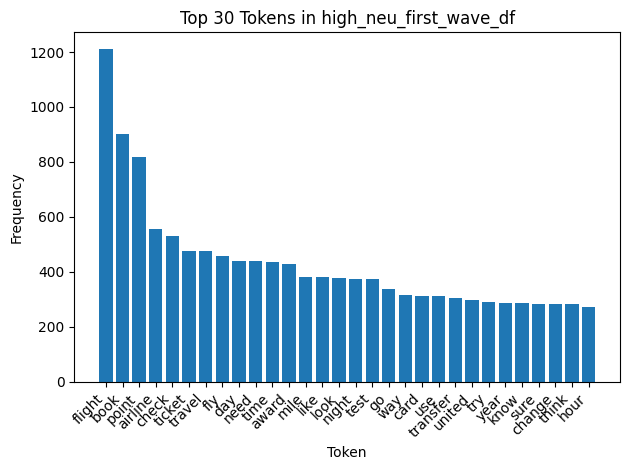

In [48]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# 1) Flatten your tokens into one long list
all_tokens = [t for toks in high_neu_first_wave_df['tokens'] for t in toks]

# 2) Build a frequency distribution
freq = Counter(all_tokens)
common = freq.most_common(30)   # top 30

# 3) Turn it into a DataFrame for easy inspection
df_freq = pd.DataFrame(common, columns=['token','count'])
print(df_freq)

# 4) Plot a simple bar chart of the top tokens
tokens, counts = zip(*common)
plt.figure()
plt.bar(tokens, counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.title('Top 30 Tokens in high_neu_first_wave_df')
plt.tight_layout()
plt.show()

In [49]:
# Flatten all tokens into one list
all_words   = [word for tokens in high_neu_first_wave_df['tokens'] for word in tokens]

# Compute the length (in tokens) of each post
post_length = [len(tokens) for tokens in high_neu_first_wave_df['tokens']]

# Build the vocabulary
vocab       = sorted(set(all_words))

# Print your summary stats
print(f"{len(all_words)} words total, with a vocabulary size of {len(vocab)}")
print(f"Max reddit post length is {max(post_length)} tokens")
print(f"Mean reddit post length is {sum(post_length)/len(post_length):.2f} tokens")
print(f"Median reddit post length is {sorted(post_length)[len(post_length)//2]} tokens")


67119 words total, with a vocabulary size of 6738
Max reddit post length is 220 tokens
Mean reddit post length is 12.00 tokens
Median reddit post length is 9 tokens


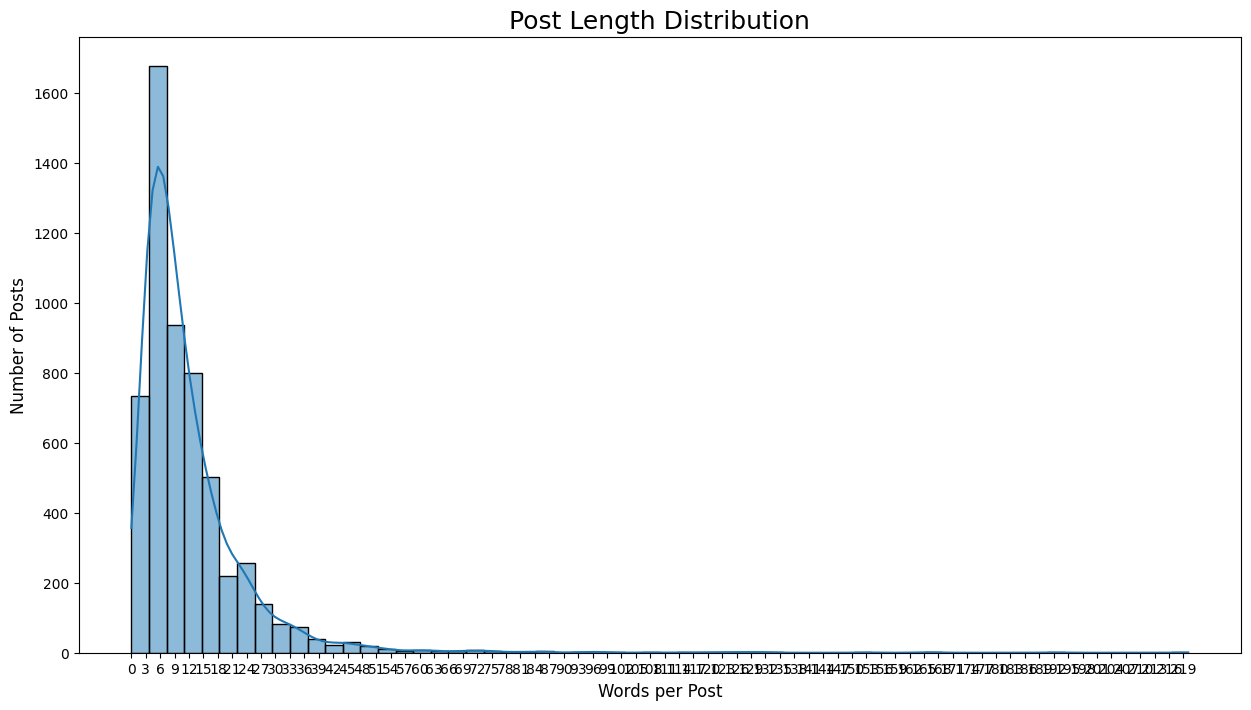

In [50]:
plt.figure(figsize=(15, 8))
sns.histplot(post_length, bins=60, kde=True)
plt.title('Post Length Distribution', fontsize=18)
plt.xlabel('Words per Post', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
# Setting x-axis ticks and labels for more detail
max_length = max(post_length)
xticks = np.arange(0, max_length + 1, max_length // 60)
plt.xticks(xticks)
plt.show()

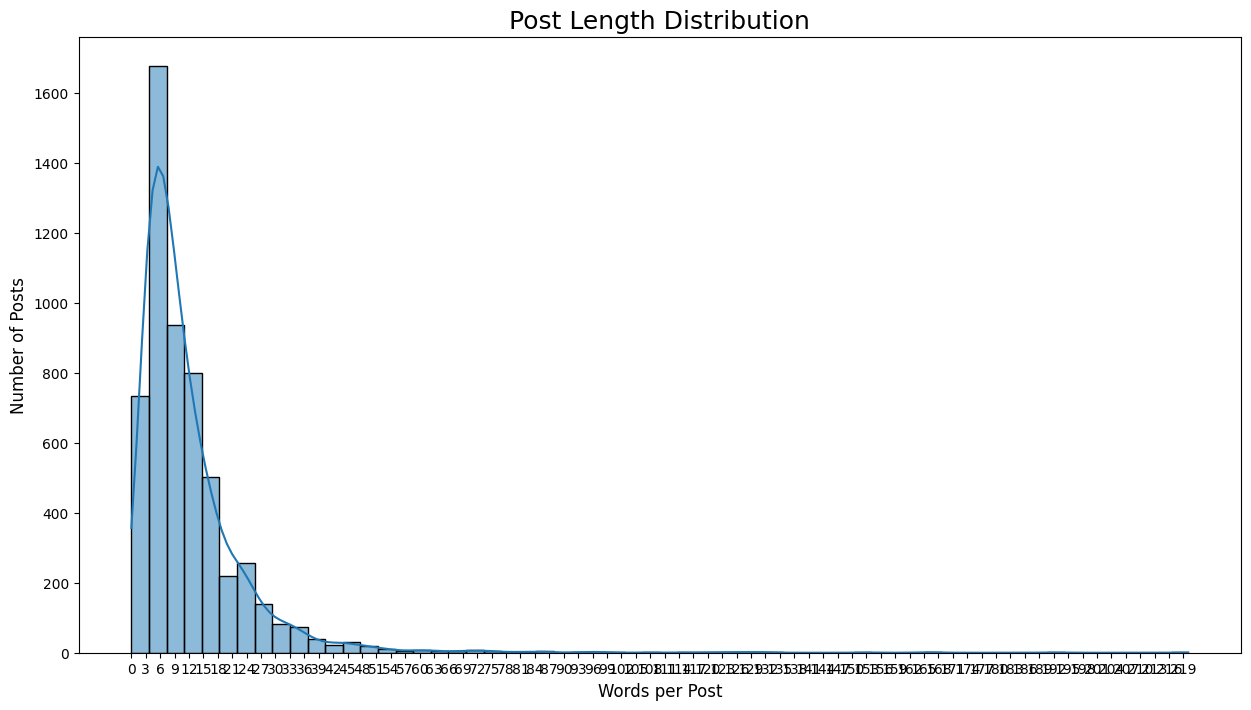

In [51]:
plt.figure(figsize=(15, 8))
sns.histplot(post_length, bins=60, kde=True)
plt.title('Post Length Distribution', fontsize=18)
plt.xlabel('Words per Post', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
# Setting x-axis ticks and labels for more detail
max_length = max(post_length)
xticks = np.arange(0, max_length + 1, max_length // 60)
plt.xticks(xticks)
plt.show()

In [52]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# 1) Prepare your list-of-lists from the `tokens` column
texts = high_neu_first_wave_df['tokens'].tolist()

# 2) Train the bigram detector
bigram = Phrases(texts, min_count=3, threshold=50)
bigram_mod = Phraser(bigram)

# 3) Train the trigram detector on the bigram-transformed texts
trigram = Phrases(bigram[texts], min_count=2, threshold=150)
trigram_mod = Phraser(trigram)

# 4) Apply bigram and trigram transforms
high_neu_first_wave_df['bigram_tokens']   = high_neu_first_wave_df['tokens'].apply(lambda doc: bigram_mod[doc])
high_neu_first_wave_df['trigram_tokens']  = high_neu_first_wave_df['tokens'].apply(lambda doc: trigram_mod[bigram_mod[doc]])

# # 5)
# high_neu_first_wave_df['bigram_text']   = high_neu_first_wave_df['bigram_tokens'].str.join(' ')
# high_neu_first_wave_df['trigram_text']  = high_neu_first_wave_df['trigram_tokens'].str.join(' ')

# 6) Inspect
print(high_neu_first_wave_df[['tokens','bigram_tokens','trigram_tokens']].head())


                                                  tokens  \
44024       [book, klm, afs, website, say, check, route]   
44026                               [vackup, plan, mile]   
44028  [standby, american, early, flight, web, specia...   
44029              [roughly, usd, feestaxe, etc, normal]   
44030  [yes, presumably, search, airline, site, trans...   

                                           bigram_tokens  \
44024       [book, klm, afs, website, say, check, route]   
44026                               [vackup, plan, mile]   
44028  [standby, american, early, flight, web_special...   
44029              [roughly, usd, feestaxe, etc, normal]   
44030  [yes, presumably, search, airline, site, trans...   

                                          trigram_tokens  
44024       [book, klm, afs, website, say, check, route]  
44026                               [vackup, plan, mile]  
44028  [standby, american, early, flight, web_special...  
44029              [roughly, usd, feestaxe

In [53]:
# 1) Helper to detect n-grams in a token list
def contains_ngram(tokenized_list, n):
    return any(len(tok.split('_')) == n for tok in tokenized_list)

# 2) Flag rows
high_neu_first_wave_df['has_bigrams']  = high_neu_first_wave_df['bigram_tokens'].apply(lambda doc: contains_ngram(doc, 2))
high_neu_first_wave_df['has_trigrams'] = high_neu_first_wave_df['trigram_tokens'].apply(lambda doc: contains_ngram(doc, 3))

# 3) Count
rows_with_bigrams  = high_neu_first_wave_df['has_bigrams'].sum()
rows_with_trigrams = high_neu_first_wave_df['has_trigrams'].sum()
rows_with_none     = (~high_neu_first_wave_df['has_bigrams'] & ~high_neu_first_wave_df['has_trigrams']).sum()

# 4) Report
print(f"Rows with bigrams:   {rows_with_bigrams}")
print(f"Rows with trigrams:  {rows_with_trigrams}")
print(f"Rows with no n-grams: {rows_with_none}")


Rows with bigrams:   1297
Rows with trigrams:  37
Rows with no n-grams: 4298


In [54]:
high_neu_first_wave_df.head()

,created_utc,label,score,cleaned_text,tokens,final_text,bigram_tokens,trigram_tokens,has_bigrams,has_trigrams
44024,2022-01-31,high neu,0.887241,sometimes book klm afs website said keep check...,"[book, klm, afs, website, say, check, route]",book klm afs website say check route,"[book, klm, afs, website, say, check, route]","[book, klm, afs, website, say, check, route]",False,False
44026,2022-01-31,high neu,0.785127,vackup plan mile,"[vackup, plan, mile]",vackup plan mile,"[vackup, plan, mile]","[vackup, plan, mile]",False,False
44028,2022-01-31,high neu,0.892244,anyone ever done standby american earlier flig...,"[standby, american, early, flight, web, specia...",standby american early flight web special awar...,"[standby, american, early, flight, web_special...","[standby, american, early, flight, web_special...",True,False
44029,2022-01-31,high neu,0.832468,roughly usd feestaxes etc normal,"[roughly, usd, feestaxe, etc, normal]",roughly usd feestaxe etc normal,"[roughly, usd, feestaxe, etc, normal]","[roughly, usd, feestaxe, etc, normal]",False,False
44030,2022-01-31,high neu,0.877216,yes presumably search first airline site trans...,"[yes, presumably, search, airline, site, trans...",yes presumably search airline site transfer po...,"[yes, presumably, search, airline, site, trans...","[yes, presumably, search, airline, site, trans...",False,False


In [55]:
# Print the total number of rows in the DataFrame
total_rows = high_neu_first_wave_df.shape[0]
print(f"Total number of rows in the DataFrame: {total_rows}")

# Check the number of rows in the 'trigram_tokenized' column
print(f"Number of rows in 'trigram_tokenized' column: {high_neu_first_wave_df['trigram_tokens'].shape[0]}")

Total number of rows in the DataFrame: 5595


KeyError: 'trigram_text'

In [ ]:
import itertools
from collections import Counter

# 1) Flatten all trigram lists into one big sequence
all_trigrams = itertools.chain.from_iterable(high_neu_first_wave_df['trigram_tokens'])

# 2) Filter for genuine trigrams (exactly two underscores → three words joined)
trigram_counts = Counter(
    token for token in all_trigrams
    if isinstance(token, str) and token.count('_') == 2
)

# 3) How many unique trigrams?
total_unique_trigrams = len(trigram_counts)
print(f"Total number of unique trigrams: {total_unique_trigrams}")

# 4) Show the 10 most common trigrams
print("\nMost common trigrams:")
for trigram, count in trigram_counts.most_common(10):
    print(f"{trigram}: {count:,}")


In [ ]:
# import gensim.corpora as corpora
# # Create Dictionary
# id2word = corpora.Dictionary(high_neu_first_wave_df['trigram_tokens'].tolist())

# ## pruning
# #id2word.filter_extremes(no_below=5, no_above=0.5)

# #    (Optional) Re-map the remaining token IDs to remove gaps
# #id2word.compactify()

# # 2. Convert each document to a Bag-of-Words
# texts = high_neu_first_wave_df['trigram_tokens'].tolist()

# # Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]


# # View
# print(corpus[:1][0][:30])

In [ ]:
# import gensim
# from gensim import corpora
# from gensim.models.ldamodel import LdaModel
# from nltk.tokenize import word_tokenize
# import nltk
# ## Build the basic LDA model
# lda_model = LdaModel(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=3,
#                                        random_state=100,
#                                        chunksize=250,
#                                        passes=200,
#                                         iterations=50,
#                                        alpha='auto',
#                                       eta='auto',
#                                        per_word_topics=True)

In [ ]:
# from pprint import pprint

# # Print the Keyword in the 3 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [ ]:
high_neu_first_wave_df.head()

In [ ]:
# from gensim.models import CoherenceModel

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=high_neu_first_wave_df['trigram_tokenized'], dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('Coherence Score: ', coherence_lda)

In [ ]:
# import pyLDAvis.gensim
# import pickle
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis
# import pyLDAvis

# # Assuming ldamodel, corpus, and dictionary are already defined
# # Enable the automatic display of visualizations in Jupyter
# pyLDAvis.enable_notebook()

# # Prepare the LDA visualization directly
# LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# # Display the prepared visualization directly in the notebook
# pyLDAvis.display(LDAvis_prepared)

In [ ]:

## FIND THE OPTIMAL TOPIC

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import numpy as np
import itertools

#
texts = high_neu_first_wave_df['trigram_tokens'].tolist()

# Create a Dictionary and Corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Function to compute coherence and perplexity
def compute_coherence_and_perplexity(corpus, dictionary, texts, num_topics, chunksize, passes, iterations,seed):
    lda_model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=seed,
                         chunksize=chunksize,
                         passes=passes,
                         iterations=iterations,
                         alpha='auto',
                         eta='auto',
                         per_word_topics=True)

    perplexity = lda_model.log_perplexity(corpus)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
      # Extract alpha and eta
    alpha = lda_model.alpha
    eta = lda_model.eta
    return perplexity, coherence, alpha, eta

# Define the parameter grid with your specific values
seeds = [0, 1, 2]
num_topics_range = range(2, 6)  # Adjust the range based on your needs
chunksize_range = [250]
passes_range = [100,  200,260]
iterations_range = [50,  100, 200]

# Store results
results = []

# Grid search over all combinations of hyperparameters
for seed in [0, 1, 2]:
  for num_topics, chunksize, passes, iterations in itertools.product(num_topics_range, chunksize_range, passes_range, iterations_range):
    perplexity, coherence, alpha, eta = compute_coherence_and_perplexity(corpus, dictionary, texts, num_topics, chunksize, passes, iterations,seed)
    results.append((num_topics, chunksize, passes, iterations, perplexity, coherence, alpha, eta,seed))
    print(f"Num Topics: {num_topics}, Chunksize: {chunksize}, Passes: {passes}, Iterations: {iterations}, Perplexity: {perplexity:.4f}, Coherence: {coherence:.4f}, Alpha: {alpha}, Eta: {eta}")

# Convert results to a DataFrame for better analysis
results_df = pd.DataFrame(results, columns=['num_topics', 'chunksize', 'passes', 'iterations', 'perplexity', 'coherence','alpha', 'eta','seed'])


# Add exponentiated perplexity column
results_df['perplexity_exp'] = np.exp(-results_df['perplexity'])

# Display results
print("\nResults:")
print(results_df)

# Find the optimal number of topics with the highest coherence
optimal_result = results_df.sort_values(
    by=['coherence', 'perplexity_exp'],
    ascending=[False, True]
).iloc[0]
optimal_num_topics = optimal_result['num_topics']
optimal_chunksize = optimal_result['chunksize']
optimal_passes = optimal_result['passes']
optimal_iterations = optimal_result['iterations']
optimal_perplexity = optimal_result['perplexity_exp']
optimal_coherence = optimal_result['coherence']
optimal_alpha = optimal_result['alpha']
optimal_eta   = optimal_result['eta']
optimal_seed = optimal_result['seed']

print(f"\nOptimal Parameters:")
print(f"Number of Topics: {optimal_num_topics}")
print(f"Chunksize: {optimal_chunksize}")
print(f"Passes: {optimal_passes}")
print(f"Iterations: {optimal_iterations}")
print(f"Coherence: {optimal_coherence:.4f}")
print(f"Perplexity: {optimal_perplexity:.4f}")
print(f" Alpha (per topic): {optimal_alpha}")
print(f" Eta   (per word):  {optimal_eta}")
print(f" seed:  {optimal_seed}")

In [ ]:
# 1. Fit the model
lda_opt = LdaModel(
    corpus        = corpus,
    id2word       = dictionary,
    num_topics    = optimal_num_topics,
    chunksize     = optimal_chunksize,
    passes        = optimal_passes,
    iterations    = optimal_iterations,
    alpha         = 'auto',
    eta           = 'auto',
    random_state  = optimal_seed,
    per_word_topics=True
)

# 2. Extract metrics and priors
opt_perp  = lda_opt.log_perplexity(corpus)
opt_coh   = CoherenceModel(model=lda_opt, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()
opt_alpha = lda_opt.alpha
opt_eta   = lda_opt.eta

print(f"Re-fitted Optimal Model:")
print(f" Coherence: {opt_coh:.4f}")
print(f" Perplexity: {opt_perp:.4f}")
print(f" Alpha (per topic): {opt_alpha}")
print(f" Eta   (per word):  {opt_eta}")


In [ ]:
import numpy as np
from google.colab import files

# 1. Grab your metrics & hyper‐params
coherence_val  = opt_coh
perplexity_val = opt_perp
alpha_val      = opt_alpha
eta_vals       = opt_eta  # full array

# 2. Write them into a single text file
with open('lda_model_full_summary.txt', 'w') as f:
    f.write("Re-fitted Optimal Model:\n")
    f.write(f" Coherence:  {coherence_val:.4f}\n")
    f.write(f" Perplexity: {perplexity_val:.4f}\n")
    f.write(f" Alpha:      {alpha_val}\n")
    f.write(" Eta values:\n")
    for eta in eta_vals:
        f.write(f"{eta}\n")

# 3. Trigger the download
files.download('lda_model_full_summary.txt')


In [ ]:
#  verify that the refit recovered the same priors
import numpy as np

print("Alpha match:", np.allclose(optimal_alpha, opt_alpha))
print("Eta   match:", np.allclose(optimal_eta,   opt_eta))


In [ ]:

from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

#
print("=== Topics ===")
pprint(lda_opt.print_topics())

doc_topics = [lda_opt.get_document_topics(doc) for doc in corpus]
print("\nSample doc-topic distribution for doc 0:")
pprint(doc_topics[0])



In [ ]:

pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_opt, corpus, dictionary)
pyLDAvis.display(vis_data)


In [ ]:
#  Print the top 30 terms per topic
print("\n=== Top 30 terms per topic ===")
for topic_id, term_weights in lda_opt.show_topics(
        num_topics=lda_opt.num_topics,
        num_words=30,
        formatted=False):
    print(f"Topic {topic_id + 1}:")
    for word, weight in term_weights:
        print(f"  {word} ({weight:.4f})")
    print()


In [ ]:
import gensim.corpora as corpora
 # Create Dictionary
id2word = corpora.Dictionary(high_neu_first_wave_df['trigram_tokens'].tolist())

# ## pruning
id2word.filter_extremes(no_below=5, no_above=0.7)

# #
id2word.compactify()

# # 2. Convert each document to a Bag-of-Words
texts = high_neu_first_wave_df['trigram_tokens'].tolist()

# # Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


# # View
print(corpus[:1][0][:30])


In [ ]:

## FIND THE OPTIMAL TOPIC

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import numpy as np
import itertools

# Create a Dictionary and Corpus
dictionary = id2word


# Function to compute coherence and perplexity
def compute_coherence_and_perplexity(corpus, dictionary, texts, num_topics, chunksize, passes, iterations):
    lda_model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=100,
                         chunksize=chunksize,
                         passes=passes,
                         iterations=iterations,
                         alpha='auto',
                         eta='auto',
                         per_word_topics=True)

    perplexity = lda_model.log_perplexity(corpus)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
      # Extract alpha and eta
    alpha = lda_model.alpha
    eta = lda_model.eta
    return perplexity, coherence, alpha, eta

# Define the parameter grid with your specific values
num_topics_range = range(2, 10)  # Adjust the range based on your needs
chunksize_range = [250]
passes_range = [100,  200,260]
iterations_range = [50,  100, 200]

# Store results
results = []

# Grid search over all combinations of hyperparameters
for num_topics, chunksize, passes, iterations in itertools.product(num_topics_range, chunksize_range, passes_range, iterations_range):
    perplexity, coherence, alpha, eta = compute_coherence_and_perplexity(corpus, dictionary, texts, num_topics, chunksize, passes, iterations)
    results.append((num_topics, chunksize, passes, iterations, perplexity, coherence, alpha, eta))
    print(f"Num Topics: {num_topics}, Chunksize: {chunksize}, Passes: {passes}, Iterations: {iterations}, Perplexity: {perplexity:.4f}, Coherence: {coherence:.4f}, Alpha: {alpha}, Eta: {eta}")

# Convert results to a DataFrame for better analysis
results_df = pd.DataFrame(results, columns=['num_topics', 'chunksize', 'passes', 'iterations', 'perplexity', 'coherence','alpha', 'eta'])


# Add exponentiated perplexity column
results_df['perplexity_exp'] = np.exp(-results_df['perplexity'])

# Display results
print("\nResults:")
print(results_df)

# Find the optimal number of topics with the highest coherence
optimal_result = results_df.sort_values(
    by=['coherence', 'perplexity_exp'],
    ascending=[False, True]
).iloc[0]
optimal_num_topics = optimal_result['num_topics']
optimal_chunksize = optimal_result['chunksize']
optimal_passes = optimal_result['passes']
optimal_iterations = optimal_result['iterations']
optimal_perplexity = optimal_result['perplexity_exp']
optimal_coherence = optimal_result['coherence']
optimal_alpha = optimal_result['alpha']
optimal_eta   = optimal_result['eta']

print(f"\nOptimal Parameters:")
print(f"Number of Topics: {optimal_num_topics}")
print(f"Chunksize: {optimal_chunksize}")
print(f"Passes: {optimal_passes}")
print(f"Iterations: {optimal_iterations}")
print(f"Coherence: {optimal_coherence:.4f}")
print(f"Perplexity: {optimal_perplexity:.4f}")
print(f" Alpha (per topic): {optimal_alpha}")
print(f" Eta   (per word):  {optimal_eta}")

In [ ]:
# 1. Fit the model
lda_opt = LdaModel(
    corpus        = corpus,
    id2word       = dictionary,
    num_topics    = optimal_num_topics,
    chunksize     = optimal_chunksize,
    passes        = optimal_passes,
    iterations    = optimal_iterations,
    alpha         = 'auto',
    eta           = 'auto',
    random_state  = 100,
    per_word_topics=True
)

# 2. Extract metrics and priors
opt_perp  = lda_opt.log_perplexity(corpus)
opt_coh   = CoherenceModel(model=lda_opt, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()
opt_alpha = lda_opt.alpha
opt_eta   = lda_opt.eta

print(f"Re-fitted Optimal Model:")
print(f" Coherence: {opt_coh:.4f}")
print(f" Perplexity: {opt_perp:.4f}")
print(f" Alpha (per topic): {opt_alpha}")
print(f" Eta   (per word):  {opt_eta}")


In [ ]:
import numpy as np
from google.colab import files

# 1. Grab your metrics & hyper‐params
coherence_val  = opt_coh
perplexity_val = opt_perp
alpha_val      = opt_alpha
eta_vals       = opt_eta  # full array

# 2. Write them into a single text file
with open('lda_model_full_summary.txt', 'w') as f:
    f.write("Re-fitted Optimal Model:\n")
    f.write(f" Coherence:  {coherence_val:.4f}\n")
    f.write(f" Perplexity: {perplexity_val:.4f}\n")
    f.write(f" Alpha:      {alpha_val}\n")
    f.write(" Eta values:\n")
    for eta in eta_vals:
        f.write(f"{eta}\n")

# 3. Trigger the download
files.download('lda_model_full_summary.txt')


In [ ]:
# verify that the refit recovered the same priors
import numpy as np

print("Alpha match:", np.allclose(optimal_alpha, opt_alpha))
print("Eta   match:", np.allclose(optimal_eta,   opt_eta))


In [ ]:
#  Imports
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

#  Print topics & sample document–topic distribution
print("=== Topics ===")
pprint(lda_opt.print_topics())

doc_topics = [lda_opt.get_document_topics(doc) for doc in corpus]
print("\nSample doc-topic distribution for doc 0:")
pprint(doc_topics[0])



In [ ]:

pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_opt, corpus, dictionary)
pyLDAvis.display(vis_data)


In [ ]:
#  Print the top 30 terms per topic
print("\n=== Top 30 terms per topic ===")
for topic_id, term_weights in lda_opt.show_topics(
        num_topics=lda_opt.num_topics,
        num_words=30,
        formatted=False):
    print(f"Topic {topic_id + 1}:")
    for word, weight in term_weights:
        print(f"  {word} ({weight:.4f})")
    print()


In [ ]:
lda_opt.save('/content/drive/MyDrive/lda_model_neu_3rd_wave_pruned_neu.gensim')

In [ ]:
# # Extracting and printing the top 30 salient terms for each topic
# num_topics = lda_model.num_topics
# num_words = 30

# for idx, topic in lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=False):
#     print(f"Topic {idx + 1}:")
#     for word, weight in topic:
#         print(f"  {word} ({weight:.4f})")
#     print()